<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
data = pd.read_csv('C://Users//Legacy//Desktop//Education//Module_3 (!Project)//real_estate_data.csv', sep='\t')
print('Общий вид первых трёх строк датафрейма:')
display(data.head(3))

Общий вид первых трёх строк датафрейма:


total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.7          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  

[3 rows x 22 columns]

In [3]:
print('Количество пропусков в данных:')
print(data.isna().sum())

Количество пропусков в данных:
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [4]:
print('Общие сведения о датафрейме:')
print(data.info())

Общие сведения о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  obj

Гистограммы по столбцам датафрейма:


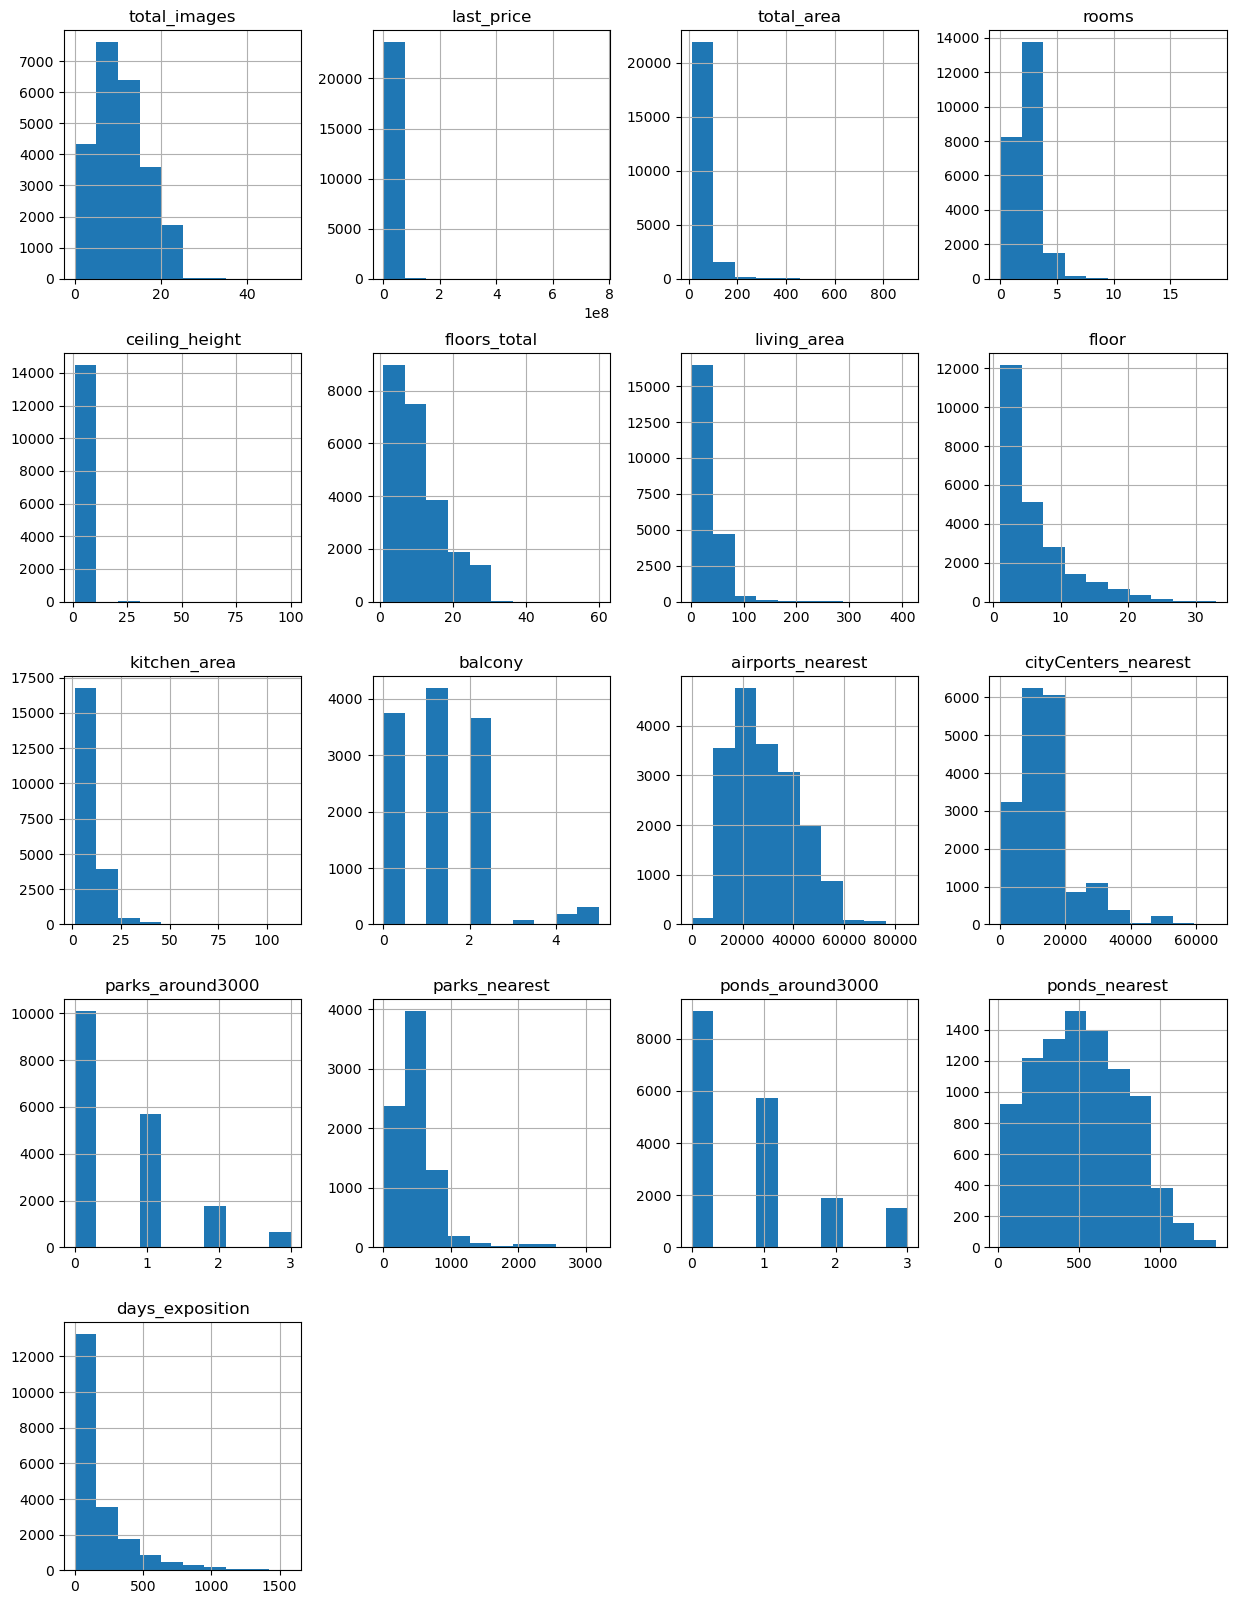

In [5]:
print('Гистограммы по столбцам датафрейма:')
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что сделал универсальную функцию для использования всех основых методов для первичного анализа, но лучше выводи её в отдельной строчке
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Разбивай, пожалуйста, код на несколько ячеек, чтобы у тебя после стены кода не шла стена выводов. Так будет более наглядно и проще комментировать твой код
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для вывода таблиц лучше использовать функцию display
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
	
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Разбил код на несколько ячеек, вывел таблицу через display, избавился от строчек над графиком.
</div>


Для выполнения проектной работы представлен файл: "real_estate_data.csv", содержащий данные сервиса Яндекс.Недвижимость.  
При первичном анализе данных выявлена необходимость в предобработке данных, т.к. данные имеют признаки наличия большого количества пропусков, выбросов, ошибок и т.д.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! 
</div>

### Предобработка данных

In [6]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Первичным анализом данных выявлено значительное количество пропусков. Часть выявленных пропусков может быть объяснена и исправлена уже на данном этапе исследования. Так, например, в стоблце: 
- **'ceiling_height'** (высота потолков (м)): *9195 пропусков* - пропуски вероятнее всего означают какое-то стандартное унифицированное значение. Основным нормативным документом, регламентирующим высоту потолков в многоквартирных домах, является СНиП 31-01-2003, для Санкт-Петербурга это значение - не менее 2,5 метров, в домах комфорт и премиум классов, как правило, 2,7 метра и более.
- **'floors_total'** (всего этажей в доме): *86 пропусков* - пропуски в столбце могли бы быть заполнены точными значениями, если бы в данных содержалась информация о типе (проекте) многоквартирного дома. При этом, сведения об общем количестве этажей врядли окажут существенное влияние на стоимость объекта;
- **'is_apartment'** (апартаменты (булев тип)): *20924 пропуска* - пропуски в данном столбце вероятнее всего означают, что объект **не** является апартаментами, т.к. апартаменты намного реже (по сравнению с квартирами) встречаются, и являются коммерческой недвижимостью;
- **'kitchen_area'** (площадь кухни в квадратных метрах (м²)): *2278 пропусков* - пропуски в данном столбце необходимо исследовать, т.к. площадь кухни для многих потенциальных покупателей является важным параметром при выборе квартир;
- **'balcony'** (число балконов): *11519 пропусков* - пропуски вероятнее всего означают отсутствие балконов вовсе;
- **'airports_nearest'** (расстояние до ближайшего аэропорта в метрах (м)): *5542 пропуска* - пропуски в данном столбце вероятнее всего означают большую удаленность от аэропорта, необходимо исследование;
- **'cityCenters_nearest'** (расстояние до центра города (м)): *5519 пропусков* - пропуски в данном столбце вероятнее всего означают большую удаленность от центра города, необходимо исследование;
- **'parks_around3000'** (число парков в радиусе 3км.): *5518 пропусков* - пропуски в данном столбце вероятнее всего означают, что парки в радиусе 3км отсутствуют, необходимо исследование;
- **'parks_nearest'** (расстояние до ближайшего парка (м)): *15620 пропусков* - пропуски в данном столбце вероятнее всего означают, что парки поблизости отсутствуют, необходимо исследование;
- **'ponds_around3000'** (число водоёмов в радиусе 3км): *5518 пропусков* - пропуски в данном столбце вероятнее всего означают, что водоемы в радиусе 3км отсутствуют, необходимо исследование;
- **'ponds_nearest'** (расстояние до ближайшего водоёма (м)): *14589 пропусков* - пропуски в данном столбце вероятнее всего означают, что водоемы поблизости отсутствуют, необходимо исследование;
- **'days_exposition'** (сколько дней было размещено объявление (от публикации до снятия)): *3181 пропуск* - пропуски вероятнее всего означают, что объект еще находится в стадии продажи;
- **'living_area'** (жилая площадь в квадратных метрах (м²)): *1903 пропуска* - пропуски в данном столбце **необходимо исследовать наиболее тщательно**, т.к. жилая площадь квартиры является одной из ключевых ценообразовательных характеристик объекта продажи;
- **'locality_name'** (название населённого пункта): *49 пропусков* - пропуски в данном столбце необходимо исследовать, т.к. местоположение квартиры является одной из ключевых ценообразовательных характеристик объекта продажи;

#### Обработаем пропуски на данном этапе исследования. Некоторые обработанные данные будем вносить в новые столбцы, с добавлением к названию окончания "_edit"

**Столбец "ceiling_height":**  
Среднее арифметическое значение (mean) высоты потолков составляет 2,77м., медианное значение (median) составляет 2,65м.
Заменим пропуски в столбце на среднее значение "2,77м", т.к. это значение наиболее приближено к стандартной, наиболее часто встречающейся высоте потолков (2,75-2,80).

In [7]:
data['ceiling_height_edit'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
print(data['ceiling_height_edit'].isna().sum())

0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

**Столбец "floors_total":**  
Среднее арифметическое значение (mean) количества этажей в доме составляет 10.67шт., медианное значение (median) составляет 9шт.
Заменим пропуски в столбце на медианное значение "9шт.", т.к. это значение наиболее приближено к стандартной, наиболее часто встречающемуся количеству этажей в доме (2,75-2,80).

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если мы заполняем таким способом, то нужно делать проверку, а не превышает ли этаж, на котором квартира общую этажность? Можно заменить на этаж квартиры либо оставить как есть
</div>

In [8]:
data['floors_total_edit'] = data['floors_total'].fillna(data['floor'])
print(data['floors_total_edit'].isna().sum())

0


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Изменил замену пропусков, вместо медианы подставил этаж квартиры.
</div>


**Столбец "is_apartment":**  
В данном столбце 20924 пропуска. Не считая пропусков, в столбце методом value_counts() выявлена информация о 2725 объектах типа "квартира", и о 50 объектах типа "апартаменты", т.е. апартаментов более чем в 50 раз меньше, чем квартир. Присваивать отсутствующим значениям типы в соотношении 50:1 случайным образом не имеет смысла, следовательно, всем пропускам будет присвоен тип "квартира" (is_apartment = False).

In [9]:
data['is_apartment_edit'] = data['is_apartment'].fillna(False)
print(data['is_apartment_edit'].isna().sum())

0


**Столбец "kitchen_area":**  
Среднее арифметическое значение (mean) площади кухни составляет 10.56м²., медианное значение (median) составляет 9.1м².
Минимальный размер общей площади квартиры составляет 12м² (1 строка). Квартиры, с общей площадью менее 18м², составляют всего 15 строк. Таким образом медианное значение площади кухни не превысит общую площадь помещения.
Заменим пропуски в столбце на медианное значение "9.1м²".

In [10]:
print(data['total_area'].sort_values().head(16))
data['kitchen_area_edit'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
print(data['kitchen_area_edit'].isna().sum())

19904    12.00
17961    13.00
19546    13.00
19807    13.00
19558    13.20
19642    14.00
16949    15.00
12040    15.00
8886     15.50
9412     16.00
10208    17.00
716      17.00
22356    17.20
9157     17.60
21802    17.78
20714    18.00
Name: total_area, dtype: float64
0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>В  таком случае, нужно проверить чтобы площадь кухни не была больше общей. Эти пропуски можно вообще не заполнять
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Изменил описание, убедился, что площадь кухни нигде не превысит общую площадь (у слишком маленьких помещений площадь кухни может составлять до 75% от общей площади, но таких значений всего 15 - такая маленькая погрешность никак не исказит исследуемые данные
</div>


**Столбец "balcony":**  
В данном столбце 11519 пропусков. Не считая пропусков, в столбце методом value_counts() выявлена информация:  
- 1 балкон: 4195 квартир,
- 0 балконов: 3758 квартир,
- 2 балкона: 3659 квартир,
- 5 балконов: 304 квартиры,
- 4 балкона: 183 квартиры,
- 3 балкона: 81 квартира,  
т.е. отсутствует информация о наличии/количестве балконов в 49% объявлений. Заменим отсутствующие значения на "0" - балконов нет.

In [11]:
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isna().sum())

0


**Столбец "locality_name":**  
В данном столбце 49 пропусков,т.е. отсутствует информация о количестве дней размещения объявления в 0,2% объявлений, данные пропуски переименованы в "Unknown".

In [12]:
data['locality_name_edit'] = data['locality_name'].fillna('Unknown')
print(data['locality_name_edit'].isna().sum())

0


**Столбец "parks_around3000":**  
В данном столбце 5518 пропусков. Не считая пропусков, в столбце методом value_counts() выявлена информация:
- 0 парков: 10106 квартир,
- 1 парк: 5681 квартира,
- 2 парка: 1747 квартир,
- 3 парка: 647 квартир,  
т.е. отсутствует информация о расстоянии до парков у 23% объявлений. Заменим отсутствующие значения на "0" - парков нет.

In [13]:
data['parks_around3000_edit'] = data['parks_around3000'].fillna(0)
print(data['parks_around3000_edit'].isna().sum())

0


**Столбец "ponds_around3000":**  
В данном столбце 5518 пропусков. Не считая пропусков, в столбце методом value_counts() выявлена информация:
- 0 водоемов: 9071 квартира,
- 1 водоем: 5717 квартир,
- 2 водоема: 1892 квартиры,
- 3 водоема: 1501 квартира,  
т.е. отсутствует информация о наличии/количестве водоемов в 23% квартир. Заменим отсутствующие значения на "0" - водоемов нет.

In [14]:
data['ponds_around3000_edit'] = data['ponds_around3000'].fillna(0)
print(data['ponds_around3000_edit'].isna().sum())

0


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Пропуски в столбцах с картографическими данными лучше не трогать. Заполняя их таким образом, ты проставляешь одинаковые расстояния до центра (парка, прудов, аэропорта) для разных квартир, хотя они могут быть расположены в разных частях города. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Убрал замены пропусков у картографических данных, оставил только количественные данные (кол-во чего-то в радиусе 3км., замененные на медианы)
</div>


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

**Столбец "days_exposition":**  
В данном столбце 3181 пропуск,т.е. отсутствует информация о количестве дней размещения объявления в 13% объявлений.  
Так как в данных не указано, что архив содержит именно объявления о проданной недвижимости, логично сделать вывод, что это архив всех объявлений, следовательно, пропуски могут объяснены тем, что квартира все еще не продана.

In [15]:
print(data['days_exposition'].isna().sum())

3181


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Если тут пропуск, то значит квартира не продана. Эти пропуски заполнять не нужно
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Убрал замены пропусков
</div>


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

**Столбец "living_area":**  
В данном столбце 1903 пропуска,т.е. отсутствует информация о площади жилой зоны в 8% объявлений.  
Среднее арифметическое значение (mean) площади жилой зоны 34м², медианное значение (median) составляет 30м².  
При этом, подставлять среднее арифметическое или медианное значение нецелесообразно, т.к. подставив среднее арифметическое или медианное значение, жилая площадь может превысить общую площадь помещения, чего не может быть в реальности.  
Также, доля жилой зоны от общей площади квартиры варьируется от 2 до 100 процентов, что может свидетельствовать о некорректном заполнении объявлений.  
Следует отметить:
- объявлений, где доля жилой зоны от общей площади квартиры составляет менее 10%, всего 5 строк,   
- объявлений, где доля жилой зоны от общей площади квартиры составляет менее 30%, всего 191 строка, 
такие погрешности можно не учитывать.  
Учитывая вышеизложенного, можно предположить "среднюю" долю жилой зоны от общей площади квартиры и определить её в размере 55%.  


In [16]:
data['living_area_edit'] = data['living_area']
data.loc[data['living_area_edit'].isna(), 'living_area_edit'] = 0.55*data.loc[data['living_area'].isna(), 'total_area']
print(data['living_area_edit'].isna().sum())

0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Лучше не создавать дополнительные столбцы, а заменять пропуски в изначальных)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Сначала так и делал, потом в Слаке прочитал от преподавателя, что лучше оригиналы не заменять :) в итоге решил сделать новые столбцы, чтобы потом при исследовании можно было сравнить, как на данные повлияла их обработка 
</div>


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Принимается)
</div>

#### Рассмотрии типы данных в каждом столбце, опишим столбцы, в которых необходимо изменить тип данных:

**Столбец ['first_day_exposition'] имеет тип данных "dtype('O')" - объект Python.**

In [17]:
print(data['first_day_exposition'].dtypes)
print(data['first_day_exposition'].head(5))

object
0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object


Преобразуем тип данных в "дата/время", т.к. в данном столбце указаны сведения о годе/месяце/дне/времени размещения объявления:

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
print(data['first_day_exposition'].dtypes)

datetime64[ns]


**Столбец ['balcony'] имеет тип данных "float64" - число с дробью.**

In [19]:
print(data['balcony'].dtypes)

float64


Преобразуем тип данных в "целочисленный" (int), т.к. в данном случае не может быть полтора или два с половиной балкона:

In [20]:
data['balcony'] = data['balcony'].astype('int')
print(data['balcony'].dtypes)

int32


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Ещё здесь нужно изменить тип данных в столбце balcony
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Добавил изменение типа данных у столбца 'balcony'.
</div>


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Проведем анализ на установление и устранение дубликатов:

Явных дубликатов в датафрейме не обнаружено:

In [21]:
print(data.duplicated().sum())

0


Единственный столбец в датафрейме, где могут располагаться неявные дубликаты - locality_name (наименование локации):

In [22]:
print(data['locality_name_edit'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Приведем наименования населенных пунктов к единому стилю:

In [23]:
data['locality_name_edit'] = data['locality_name_edit'].str.replace('посёлок городского типа|городской посёлок|коттеджный посёлок|посёлок', 'поселок', regex=True)
print(data['locality_name_edit'].isna().sum())
print(data['locality_name_edit'].unique())

0
['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Фёдоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок Лебяжье' 'поселок Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

#### Проведем анализ на предмет наличия аномальных значений (артефактов):

**Столбец "total_area" (общая площадь):**

В объявлениях встречаются квартиры, общей площадью:  
- более 250м²
- более 600м²  
Общее количество объявлений с площадью квартир более 250м² составляет 112 строк - 0,4% от общего количества объявлений, данные объявления являются аномальными, и могут быть исключены из анализа

In [24]:
print('Минимальный показатель:', data['total_area'].min())
print()
print('Максимальный показатель:', data['total_area'].max())
print()
print('Значения по убыванию:', data['total_area'].sort_values(ascending=False).head(5))
print()
print('Значения по возрастанию:', data['total_area'].sort_values(ascending=True).head(5))
data.query('total_area > 250')

Минимальный показатель: 12.0

Максимальный показатель: 900.0

Значения по убыванию: 19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
Name: total_area, dtype: float64

Значения по возрастанию: 19904    12.0
17961    13.0
19546    13.0
19807    13.0
19558    13.2
Name: total_area, dtype: float64


total_images   last_price  total_area first_day_exposition  rooms  \
155               8   96000000.0       317.0           2017-07-07      4   
464              15   66571000.0       280.3           2015-06-11      6   
581              20   65000000.0       365.0           2019-03-18      7   
660               3   49950000.0       483.9           2017-10-04      7   
793              20  135000000.0       310.0           2018-05-22      4   
...             ...          ...         ...                  ...    ...   
22238            12   19500000.0       287.5           2017-12-27      7   
22345             8   53250000.0       290.0           2017-09-25      6   
22494             7   91075000.0       491.0           2017-05-27      5   
22835            20   29000000.0       275.0           2018-07-27      5   
23005            20   30750000.0       297.5           2018-09-09      6   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
155              3.50           3.0        183.0      3          NaN  ...   
464              5.20           8.0        159.5      7          NaN  ...   
581              2.90           7.0          NaN      7          NaN  ...   
660              3.20           6.0        312.5      4          NaN  ...   
793              3.30           5.0        250.0      2          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
22238             NaN           4.0        183.7      3          NaN  ...   
22345            2.90           7.0        180.0      6          NaN  ...   
22494            4.20           9.0        274.0      9          NaN  ...   
22835             NaN          17.0        180.0     17          NaN  ...   
23005            3.14           4.0        181.8      2          NaN  ...   

       ponds_nearest  days_exposition  ceiling_height_edit  floors_total_edit  \
155            366.0             62.0             3.500000                3.0   
464            616.0            578.0             5.200000                8.0   
581             58.0              NaN             2.900000                7.0   
660             22.0            391.0             3.200000                6.0   
793            190.0            342.0             3.300000                5.0   
...              ...              ...                  ...                ...   
22238          853.0             90.0             2.771499                4.0   
22345            NaN            134.0             2.900000                7.0   
22494            NaN            115.0             4.200000                9.0   
22835          502.0             91.0             2.771499               17.0   
23005           40.0             42.0             3.140000                4.0   

      is_apartment_edit  kitchen_area_edit  locality_name_edit  \
155               False                9.1     Санкт-Петербург   
464               False               21.1     Санкт-Петербург   
581               False                9.1     Санкт-Петербург   
660               False               26.4     Санкт-Петербург   
793               False               50.0     Санкт-Петербург   
...                 ...                ...                 ...   
22238             False               26.0     Санкт-Петербург   
22345             False               18.0     Санкт-Петербург   
22494             False               45.0     Санкт-Петербург   
22835             False               17.0     Санкт-Петербург   
23005             False               21.9     Санкт-Петербург   

       parks_around3000_edit  ponds_around3000_edit  living_area_edit  
155                      2.0                    3.0            183.00  
464                      3.0                    1.0            159.50  
581                      3.0                    3.0            200.75  
660                      3.0                    3.0            312.50  
793                      2.0               

In [25]:
data = data[data['total_area'] < 250]
data.query('total_area > 250')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, ceiling_height_edit, floors_total_edit, is_apartment_edit, kitchen_area_edit, locality_name_edit, parks_around3000_edit, ponds_around3000_edit, living_area_edit]
Index: []

[0 rows x 30 columns]

**Столбец "last_price" (цена):**

В объявлениях встречаются квартиры, стоимостью:  
- более 50млн.руб.
- более 100млн.руб.  
Общее количество объявлений со стоимостью более 50млн.руб. составляет 75 строк - 0,3% от общего количества объявлений, данные объявления являются аномальными, и могут быть исключены из анализа

In [26]:
print('Минимальный показатель:', data['last_price'].min())
print()
print('Максимальный показатель:', data['last_price'].max())
print()
print('Значения по убыванию:', data['last_price'].sort_values(ascending=False).head(5))
print()
print('Значения по возрастанию:', data['last_price'].sort_values(ascending=True).head(5))
data.query('last_price > 50000000')

Минимальный показатель: 12190.0

Максимальный показатель: 330000000.0

Значения по убыванию: 1436     330000000.0
22831    289238400.0
19155    160000000.0
2536     159984000.0
7857     150000000.0
Name: last_price, dtype: float64

Значения по возрастанию: 8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
5698     450000.0
Name: last_price, dtype: float64


total_images   last_price  total_area first_day_exposition  rooms  \
3                 0   64900000.0       159.0           2015-07-24      3   
492              18   95000000.0       216.0           2017-12-05      4   
509               5   90000000.0       225.0           2016-06-26      6   
1436             19  330000000.0       190.0           2018-04-04      3   
1706             10   62171920.0       200.3           2018-05-19      3   
...             ...          ...         ...                  ...    ...   
22709            20   59000000.0       127.5           2016-12-21      4   
22804             4   81960000.0       205.0           2017-09-29      4   
22831            18  289238400.0       187.5           2019-03-19      2   
22907             9   65000000.0       228.0           2016-06-02      4   
23574            14   64990000.0       139.0           2015-11-24      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
3                 NaN          14.0          NaN      9          NaN  ...   
492              3.00           5.0         86.0      4          NaN  ...   
509               NaN           4.0        134.0      2          NaN  ...   
1436             3.50           7.0         95.0      5          NaN  ...   
1706              NaN          16.0        101.0     11          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
22709            3.00          12.0         85.0      8          NaN  ...   
22804            3.20           9.0        108.0      3          NaN  ...   
22831            3.37           6.0         63.7      6          NaN  ...   
22907             NaN           5.0        200.0      2          NaN  ...   
23574            3.00           8.0          3.0      8          NaN  ...   

       ponds_nearest  days_exposition  ceiling_height_edit  floors_total_edit  \
3              234.0            424.0             2.771499               14.0   
492            620.0             14.0             3.000000                5.0   
509            519.0            416.0             2.771499                4.0   
1436           285.0            233.0             3.500000                7.0   
1706           182.0              NaN             2.771499               16.0   
...              ...              ...                  ...                ...   
22709          234.0            635.0             3.000000               12.0   
22804          227.0            169.0             3.200000                9.0   
22831          188.0              NaN             3.370000                6.0   
22907          269.0              NaN             2.771499                5.0   
23574          100.0            280.0             3.000000                8.0   

      is_apartment_edit  kitchen_area_edit  locality_name_edit  \
3                 False                9.1     Санкт-Петербург   
492               False               77.0     Санкт-Петербург   
509               False               19.5     Санкт-Петербург   
1436              False               40.0     Санкт-Петербург   
1706              False               32.1     Санкт-Петербург   
...                 ...                ...                 ...   
22709             False               13.0     Санкт-Петербург   
22804             False               10.0     Санкт-Петербург   
22831             False               30.2     Санкт-Петербург   
22907             False                9.1     Санкт-Петербург   
23574             False               16.0     Санкт-Петербург   

       parks_around3000_edit  ponds_around3000_edit  living_area_edit  
3                        2.0                    3.0             87.45  
492                      2.0                    3.0             86.00  
509                      0.0                    2.0            134.00  
1436                     3.0                    3.0             95.00  
1706                     0.0               

In [27]:
data = data[data['last_price'] < 50000000]
data.query('last_price > 50000000')

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, ceiling_height_edit, floors_total_edit, is_apartment_edit, kitchen_area_edit, locality_name_edit, parks_around3000_edit, ponds_around3000_edit, living_area_edit]
Index: []

[0 rows x 30 columns]

**Столбец "floors_total" (кол-во этажей, всего):**

In [28]:
print('Минимальный показатель:', data['floors_total'].min())
print()
print('Максимальный показатель:', data['floors_total'].max())
print()
print('Значения по убыванию:', data['floors_total'].sort_values(ascending=False).head(5))
print()
print('Значения по возрастанию:', data['floors_total'].sort_values(ascending=True).head(5))

Минимальный показатель: 1.0

Максимальный показатель: 60.0

Значения по убыванию: 2253     60.0
16731    52.0
16934    37.0
11079    36.0
5807     36.0
Name: floors_total, dtype: float64

Значения по возрастанию: 23498    1.0
22855    1.0
3076     1.0
15543    1.0
11746    1.0
Name: floors_total, dtype: float64


Согласно сведениям из различных интернет-источников, в т.ч. https://spbhomes.ru/science/civilizaciya-na-neve-studii-v-dome-biznes-klassa/, максимальное количество этажей в здании (независимо от типа) - 42 этажа, следовательно, значения больше 42 - являются аномальными.

In [29]:
print((data['floors_total'] > 42).sum())

2


Заменим аномальные значения на медианное (наиболее вероятное) значение:

In [30]:
data.loc[(data['floors_total'] > 42), 'floors_total'] = data['floors_total'].median()

**Столбец "ceiling_height" (высота потолка):**

In [31]:
print('Минимальный показатель:', data['ceiling_height_edit'].min())
print()
print('Максимальный показатель:', data['ceiling_height_edit'].max())
print()
print('Значения по убыванию:', data['ceiling_height_edit'].sort_values(ascending=False).head(5))
print()
print('Значения по возрастанию:', data['ceiling_height_edit'].sort_values(ascending=True).head(5))

Минимальный показатель: 1.0

Максимальный показатель: 100.0

Значения по убыванию: 22869    100.0
3148      32.0
22336     32.0
21377     27.5
22938     27.0
Name: ceiling_height_edit, dtype: float64

Значения по возрастанию: 22590    1.00
5712     1.20
16934    1.75
5850     2.00
552      2.00
Name: ceiling_height_edit, dtype: float64


In [32]:
print((data['ceiling_height_edit'] < 2).sum())
print((data['ceiling_height_edit'] >= 11).sum())

3
24


Согласно сведениям из различных интернет-источников, в т.ч.:
- https://elitnoe.ru/articles/991-top-5-elitnyh-kvartir-s-vysotoy-potolkov-ot-5-do-10-metrov
- https://www.dp.ru/a/2016/10/27/Dostich_potolka  
максимальная высота потолков составляет 10 метов, значения больше 11 - являются аномальными, также как и значения менее 2 метров.

Значения в диапазоне от 20 до 100 метров вероятно являются ошибкой в данных, в которых пропущен разделитель ".", т.е. не "20", а "2.0".  
Значения высоты менее 2 метров, заменим медианным значением.

In [33]:
data.loc[data['ceiling_height_edit'] >= 11, 'ceiling_height_edit'] = data['ceiling_height_edit'] / 10
data.loc[data['ceiling_height_edit'] < 2, 'ceiling_height_edit'] = data['ceiling_height_edit'].median()
print((data['ceiling_height_edit'] < 2).sum())
print((data['ceiling_height_edit'] >= 11).sum())

0
0


**Столбец "rooms" (кол-во комнат):**

In [34]:
print('Минимальный показатель:', data['rooms'].min())
print()
print('Максимальный показатель:', data['rooms'].max())
print()
print('Значения по убыванию:', data['rooms'].sort_values(ascending=False).head(5))
print()
print('Значения по возрастанию:', data['rooms'].sort_values(ascending=True).head(5))

Минимальный показатель: 0

Максимальный показатель: 14

Значения по убыванию: 20829    14
9688     11
648      11
18119    10
8860      9
Name: rooms, dtype: int64

Значения по возрастанию: 716     0
2727    0
839     0
7008    0
7237    0
Name: rooms, dtype: int64


In [35]:
display(data.query('rooms > 10'))

total_images  last_price  total_area first_day_exposition  rooms  \
648               3  17500000.0       183.7           2018-07-01     11   
9688              8  33000000.0       194.1           2017-02-07     11   
20829             6  28659000.0       245.4           2016-03-31     14   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
648              3.40           7.0        138.8      7          NaN  ...   
9688             3.43           5.0        129.0      2          NaN  ...   
20829             NaN           4.0        168.3      2          NaN  ...   

       ponds_nearest  days_exposition  ceiling_height_edit  floors_total_edit  \
648              NaN              NaN             3.400000                7.0   
9688            66.0            813.0             3.430000                5.0   
20829          118.0             95.0             2.771499                4.0   

      is_apartment_edit  kitchen_area_edit  locality_name_edit  \
648               False               13.3     Санкт-Петербург   
9688              False               11.9     Санкт-Петербург   
20829             False               25.9     Санкт-Петербург   

       parks_around3000_edit  ponds_around3000_edit  living_area_edit  
648                      0.0                    0.0             138.8  
9688                     1.0                    2.0             129.0  
20829                    3.0                    2.0             168.3  

[3 rows x 30 columns]

Квартирам с количеством комнат более 10 (8 строк) соответствуют площади квартир от 183 до 900 кв. метров, что может соответствовать действительности.

*Количество комнат, как таковое, является переменчивым вариативным фактором, не особо влияющим на стоимость квартиры, т.к. основное влияние оказывает такой показатель, как общая площадь квартиры*

Посмотрим, как в среднем распределяется количество комнат в зависимости от площади помещения:

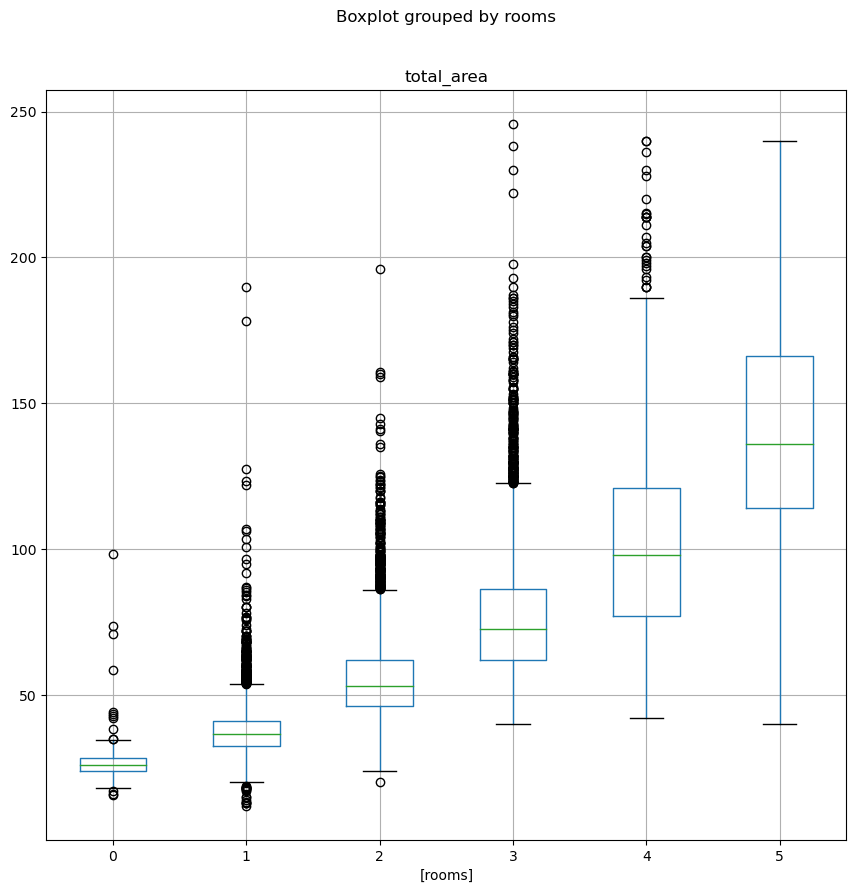

In [36]:
data[data["rooms"].isin([0,1,2,3,4,5])][["rooms", "total_area"]].boxplot(by="rooms", figsize=(10,10));

Обработаем строки, в которых число комнат равно 0:

In [37]:
def calc_rooms(row):
    if row.rooms > 0:
        return row.rooms
    else:
        if row.total_area < 30:
            return 1
        if row.total_area < 60:
            return 2
        if row.total_area < 90:
            return 3
        if row.total_area > 90:
            return 4
data['rooms_edit'] = data['rooms']
data['rooms_edit'] = data.apply(calc_rooms, axis=1)

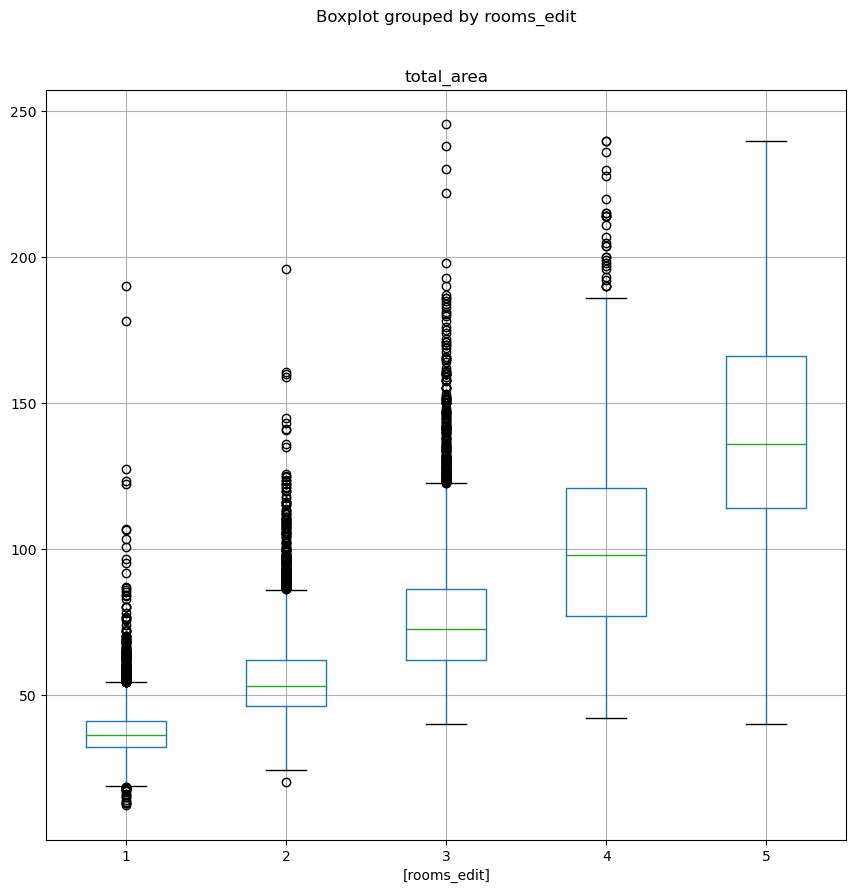

In [38]:
data[data["rooms_edit"].isin([0,1,2,3,4,5])][["rooms_edit", "total_area"]].boxplot(by="rooms_edit", figsize=(10,10));

**Столбец "kitchen_area" (площадь кухни):**

In [39]:
print('Минимальный показатель:', data['kitchen_area'].min())
print()
print('Максимальный показатель', data['kitchen_area'].max())
print()
print('Значения по убыванию:', data['kitchen_area'].sort_values(ascending=False).head(5))
print()
print('Значения по возрастанию:', data['kitchen_area'].sort_values(ascending=True).head(5))
display(data.sort_values(by='total_area').query('kitchen_area < 5'))

Минимальный показатель: 1.3

Максимальный показатель 75.0

Значения по убыванию: 14644    75.0
6193     70.0
22980    65.0
18447    65.0
15780    64.0
Name: kitchen_area, dtype: float64

Значения по возрастанию: 20217    1.3
9138     2.0
11033    2.0
19642    2.0
21419    2.0
Name: kitchen_area, dtype: float64


total_images  last_price  total_area first_day_exposition  rooms  \
19642             5   1190000.0       14.00           2018-07-29      1   
10208             3   1900000.0       17.00           2018-08-14      1   
6084              6    770000.0       18.00           2017-10-16      1   
8729              9   2200000.0       18.40           2018-08-20      1   
21419             4   1870000.0       20.00           2018-03-06      1   
...             ...         ...         ...                  ...    ...   
5415             16   8200000.0       60.00           2015-12-16      3   
12285            15   2950000.0       60.20           2017-12-30      3   
18989            10   8000000.0       60.65           2015-02-19      2   
22623             8   3100000.0       61.00           2018-04-03      4   
7950              3   5967734.0       66.40           2017-02-07      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
19642             NaN           5.0        11.00      1          NaN  ...   
10208            2.75           4.0        13.00      2        False  ...   
6084              NaN           5.0        13.00      4          NaN  ...   
8729             2.52           3.0        14.00      3          NaN  ...   
21419            2.50           5.0        14.00      1          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
5415              NaN          12.0        38.70      3        False  ...   
12285            2.58           5.0        43.30      1          NaN  ...   
18989            3.20           6.0        39.07      2          NaN  ...   
22623            2.60           5.0        44.90      4          NaN  ...   
7950              NaN           4.0        44.40      2        False  ...   

       days_exposition  ceiling_height_edit  floors_total_edit  \
19642              4.0             2.771499                5.0   
10208              7.0             2.750000                4.0   
6084              90.0             2.771499                5.0   
8729              59.0             2.520000                3.0   
21419             45.0             2.500000                5.0   
...                ...                  ...                ...   
5415             184.0             2.771499               12.0   
12285            323.0             2.580000                5.0   
18989           1322.0             3.200000                6.0   
22623             57.0             2.600000                5.0   
7950             335.0             2.771499                4.0   

       is_apartment_edit kitchen_area_edit    locality_name_edit  \
19642              False              2.00       Санкт-Петербург   
10208              False              3.00       Санкт-Петербург   
6084               False              3.00                Тихвин   
8729               False              2.40                Пушкин   
21419              False              2.00       Санкт-Петербург   
...                  ...               ...                   ...   
5415               False              4.80       Санкт-Петербург   
12285              False              4.20  поселок Первомайское   
18989              False              4.50       Санкт-Петербург   
22623              False              4.80        деревня Оржицы   
7950               False              2.89       Санкт-Петербург   

       parks_around3000_edit  ponds_around3000_edit  living_area_edit  \
19642                    0.0                    0.0             11.00   
10208                    0.0                    0.0             13.00   
6084                     0.0                    0.0             13.00   
8729                     0.0                    1.0             14.00   
21419                    1.0                    1.0             14.00   
...                      ...                    ...               ...   
5415                     0.0                    0.0         

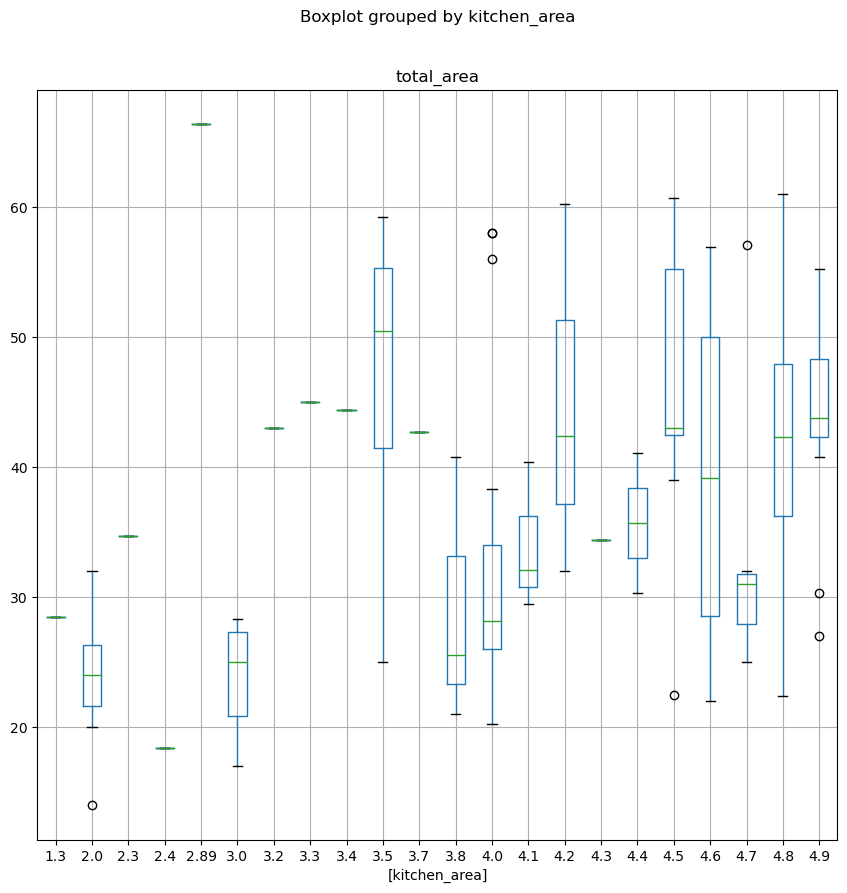

In [40]:
data[data["kitchen_area"] < 5][["kitchen_area", "total_area"]].boxplot(by="kitchen_area", figsize=(10,10));

Согласно действующему СНиП 31-01-2003 "В однокомнатных квартирах допускается проектировать кухни или кухни-ниши площадью не менее 5м²". Заменим аномально низкие значения на минимально-допустимые.

In [41]:
data.loc[data['kitchen_area_edit'] < 5, 'kitchen_area_edit'] = 5
print(data.sort_values(by='kitchen_area_edit').query('kitchen_area_edit < 5'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, ceiling_height_edit, floors_total_edit, is_apartment_edit, kitchen_area_edit, locality_name_edit, parks_around3000_edit, ponds_around3000_edit, living_area_edit, rooms_edit]
Index: []

[0 rows x 31 columns]


**Столбец "airports_nearest" (расстояние до ближайшего аэропорта):**

In [42]:
print('Минимальный показатель:', data['airports_nearest'].min())
print()
print('Максимальный показатель:', data['airports_nearest'].max())
print()
print('Значения по убыванию:', data['airports_nearest'].sort_values(ascending=False).head(5))
print()
print('Значения по возрастанию:', data['airports_nearest'].sort_values(ascending=True).head(5))

Минимальный показатель: 0.0

Максимальный показатель: 84869.0

Значения по убыванию: 9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
Name: airports_nearest, dtype: float64

Значения по возрастанию: 21085       0.0
4017     6450.0
12899    6450.0
7778     6914.0
23150    6949.0
Name: airports_nearest, dtype: float64


Найдено одно аномальное значение - "0". Заменим данное значение на медианное

In [43]:
data.loc[(data['airports_nearest'] == 0), 'airports_nearest'] = data['airports_nearest'].median()

**Столбец "parks_nearest" (расстояние до ближайшего парка):**

Найдено 3 аномальных значения, если допустить, что дом расположен прямо возле парка (через дорогу):

In [44]:
print('Минимальный показатель:', data['parks_nearest'].min())
print()
print('Максимальный показатель:', data['parks_nearest'].max())
print()
print('Значения по убыванию:', data['parks_nearest'].sort_values(ascending=False).head(5))
print()
print('Значения по возрастанию:', data['parks_nearest'].sort_values(ascending=True).head(5))
print(data.query('parks_nearest < 10'))

Минимальный показатель: 1.0

Максимальный показатель: 3190.0

Значения по убыванию: 19430    3190.0
10959    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
Name: parks_nearest, dtype: float64

Значения по возрастанию: 14624    1.0
11949    3.0
22941    4.0
9344     7.0
20193    9.0
Name: parks_nearest, dtype: float64
       total_images  last_price  total_area first_day_exposition  rooms  \
2527              8   4690000.0        60.3           2016-03-05      2   
9344             12   3000000.0        28.1           2017-07-25      1   
11949             7   4500000.0        44.0           2017-11-24      2   
14624             8   3770000.0        45.4           2019-03-20      2   
20193             3  11809670.0       102.6           2017-04-21      3   
22941             8  10965000.0        69.3           2019-01-10      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
2527              2.5           5.0        28.00      2          NaN  

Согласно действующему законодательству (СП 42.13330.2016 п. 11.5),  улица в жилой застройке должна иметь ширину в красных линиях, равную минимум 10 метрам

In [45]:
data.loc[data['parks_nearest'] < 10, 'parks_nearest'] = 10
print(data.query('parks_nearest < 10'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, ceiling_height_edit, floors_total_edit, is_apartment_edit, kitchen_area_edit, locality_name_edit, parks_around3000_edit, ponds_around3000_edit, living_area_edit, rooms_edit]
Index: []

[0 rows x 31 columns]


**Столбец "ponds_nearest" (расстояние до ближайшего водоема):**

Согласно действующему законодательству (Водный Кодекс РФ) приняты следующие нормы расстояния построек от воды - не менее 50м.

In [46]:
print('Минимальный показатель:', data['ponds_nearest'].min())
print('Максимальный показатель:', data['ponds_nearest'].max())
print('Значения по убыванию:', data['ponds_nearest'].sort_values(ascending=False).head(5))
print('Значения по возрастанию:', data['ponds_nearest'].sort_values(ascending=True).head(5))

Минимальный показатель: 13.0
Максимальный показатель: 1344.0
Значения по убыванию: 20726    1344.0
19924    1341.0
19138    1341.0
1476     1337.0
12054    1313.0
Name: ponds_nearest, dtype: float64
Значения по возрастанию: 1548     13.0
17585    13.0
1733     16.0
10358    16.0
23343    16.0
Name: ponds_nearest, dtype: float64


In [47]:
data.loc[data['ponds_nearest'] < 50, 'ponds_nearest'] = 50
print(data.query('ponds_nearest < 50'))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, ceiling_height_edit, floors_total_edit, is_apartment_edit, kitchen_area_edit, locality_name_edit, parks_around3000_edit, ponds_around3000_edit, living_area_edit, rooms_edit]
Index: []

[0 rows x 31 columns]


**Аномальных значений в иных столбцах не обнаружено**


Для более понятного и логичного представления столбцов (с учетом созданных - отредактированных), изменим индексы столбцов:

In [48]:
data = data.reindex(columns=['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'rooms_edit', 'ceiling_height', 'ceiling_height_edit', 'floors_total', 'floors_total_edit', 'living_area', 'living_area_edit', 'floor', 'is_apartment', 'is_apartment_edit', 'studio', 'open_plan', 'kitchen_area', 'kitchen_area_edit', 'balcony', 'locality_name', 'locality_name_edit', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_around3000_edit', 'parks_nearest', 'ponds_around3000', 'ponds_around3000_edit', 'ponds_nearest', 'days_exposition'])
display(data.head(3))

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   

   rooms_edit  ceiling_height  ceiling_height_edit  floors_total  \
0           3             2.7             2.700000          16.0   
1           1             NaN             2.771499          11.0   
2           2             NaN             2.771499           5.0   

   floors_total_edit  ...  locality_name_edit  airports_nearest  \
0               16.0  ...     Санкт-Петербург           18863.0   
1               11.0  ...      поселок Шушары           12817.0   
2                5.0  ...     Санкт-Петербург           21741.0   

   cityCenters_nearest parks_around3000  parks_around3000_edit  parks_nearest  \
0              16028.0              1.0                    1.0          482.0   
1              18603.0              0.0                    0.0            NaN   
2              13933.0              1.0                    1.0           90.0   

   ponds_around3000  ponds_around3000_edit  ponds_nearest  days_exposition  
0               2.0                    2.0          755.0              NaN  
1               0.0                    0.0            NaN             81.0  
2               2.0                    2.0          574.0            558.0  

[3 rows x 31 columns]

Количество пропусков в данных:
total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
rooms_edit                   0
ceiling_height            9123
ceiling_height_edit          0
floors_total                85
floors_total_edit            0
living_area               1878
living_area_edit             0
floor                        0
is_apartment             20745
is_apartment_edit            0
studio                       0
open_plan                    0
kitchen_area              2252
kitchen_area_edit            0
balcony                      0
locality_name               49
locality_name_edit           0
airports_nearest          5537
cityCenters_nearest       5516
parks_around3000          5515
parks_around3000_edit        0
parks_nearest            15560
ponds_around3000          5515
ponds_around3000_edit        0
ponds_nearest            14543
days_exposition           3138
dtype: i

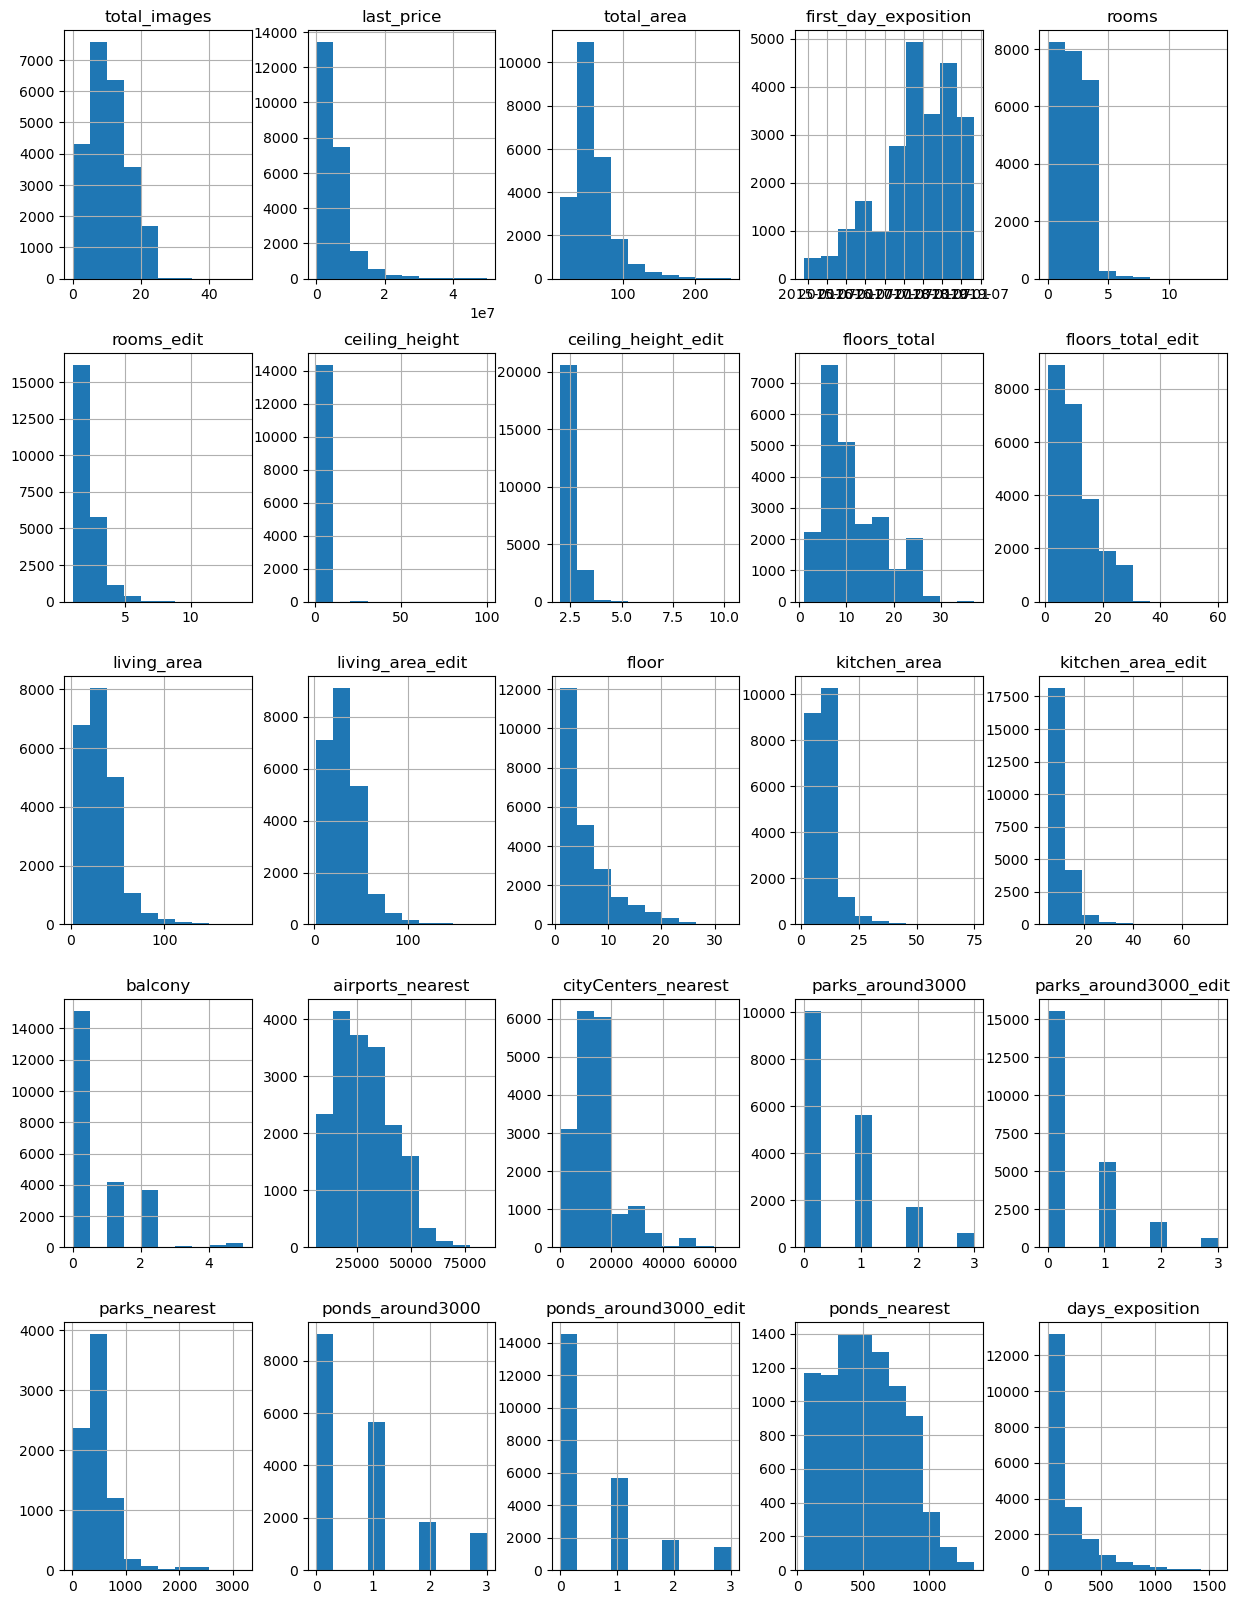

In [49]:
print('Количество пропусков в данных:')
print(data.isna().sum())
print()
print('Гистограммы по столбцам датафрейма:')
data.hist(figsize=(15, 20));

Распределения на гистограммах (по созданным столбцам _edit) приняло вид, более похожий на нормальное распределение.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно!
</div>

### Посчитаем и добавим в таблицу новые столбцы:

**Создадим столбец со стоимостью одного квадратного метра:**

In [50]:
data['price_for_1m2'] = data['last_price'] / data['total_area']
print(data['price_for_1m2'].head())

0    120370.370370
1     82920.792079
2     92785.714286
4    100000.000000
5     95065.789474
Name: price_for_1m2, dtype: float64


**Создадим столбец, отражающий день недели публикации:**

In [51]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday
print(data['day_exposition'].head())

0    3
1    1
2    3
4    1
5    0
Name: day_exposition, dtype: int64


**Создадим столбец, отражающий месяц публикации:**

In [52]:
data['month_exposition'] = data['first_day_exposition'].dt.month
print(data['month_exposition'].head())

0     3
1    12
2     8
4     6
5     9
Name: month_exposition, dtype: int64


**Создадим столбец, отражающий год публикации:**

In [53]:
data['year_exposition'] = data['first_day_exposition'].dt.year
print(data['year_exposition'].head(5))

0    2019
1    2018
2    2015
4    2018
5    2018
Name: year_exposition, dtype: int64


**Создадим столбец, отражающий тип этажа квартиры (значения - «первый», «последний», «другой»):**

In [54]:
def categorize_floor(row):
    if row.floor == row.floors_total_edit:
        return 'последний'
    elif row.floor == 1:
        return 'первый'
    elif row.floor != 1 and row.floor != row.floors_total_edit:
        return 'другой'
data['floor_category'] = data['floor']
data['floor_category'] = data.apply(categorize_floor, axis=1)
print(data['floor_category'].head(5))

0    другой
1    первый
2    другой
4    другой
5    другой
Name: floor_category, dtype: object


**Создадим столбец, отражающий расстояние до центра города в километрах:**

In [55]:
data['cityCenters_nearest_edit'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
data['cityCenters_nearest_km'] = (0.001 * data['cityCenters_nearest_edit'])
data['cityCenters_nearest_km']= data['cityCenters_nearest_km'].astype(int)
print(data['cityCenters_nearest_km'].head(5))

0    16
1    18
2    13
4     8
5    13
Name: cityCenters_nearest_km, dtype: int32


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведем исследовательский анализ данных:

#### Изучим следующие параметры объектов:

**Столбец 'total_area' (общая площадь):**

Графически отобразим данные:

count    23502.000000
mean        58.547568
std         27.890313
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        249.900000
Name: total_area, dtype: float64

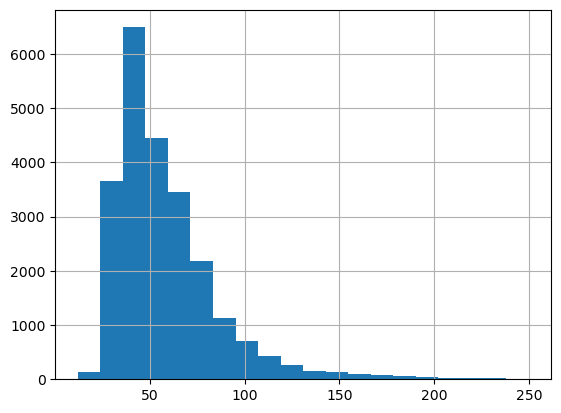

In [56]:
data['total_area'].hist(bins=20)
data['total_area'].describe()

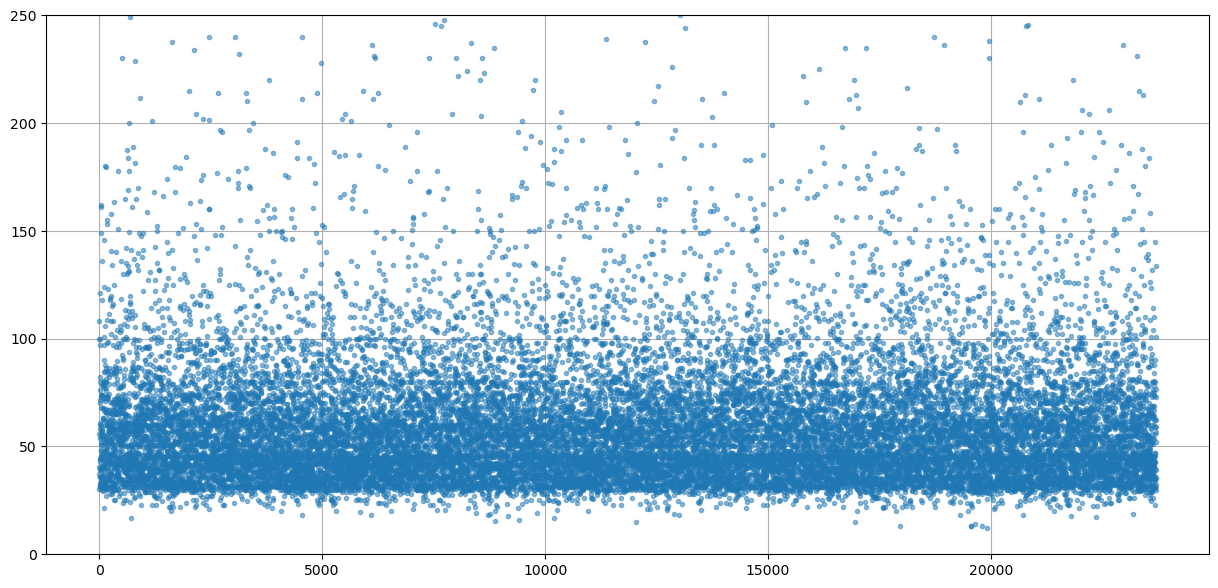

In [57]:
data['total_area'].sort_values().plot(ylim=(0, 250), style='.', grid=True, alpha=0.5, figsize=(15, 7));

Из проведенного анализа видно, что наибольшая доля объявлений приходится на квартиры, с общей площадью от 30м² до 80м², медианным значением общей площади является 52м².

**Столбец 'living_area' (жилая площадь), исходные и отредактированные данные:**

Графически отобразим данные:

- Исходные данные:

count    21624.000000
mean        33.520631
std         18.358978
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        184.000000
Name: living_area, dtype: float64

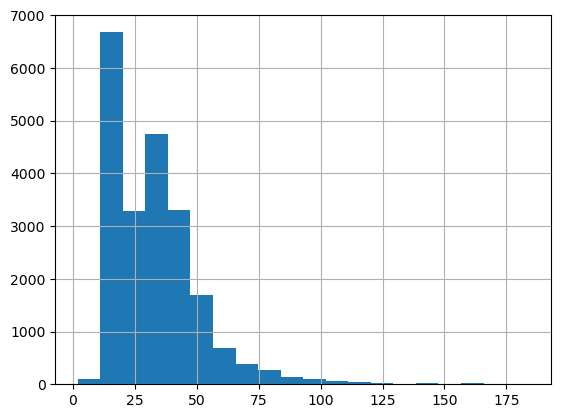

In [58]:
data['living_area'].hist(bins=20)
data['living_area'].describe()

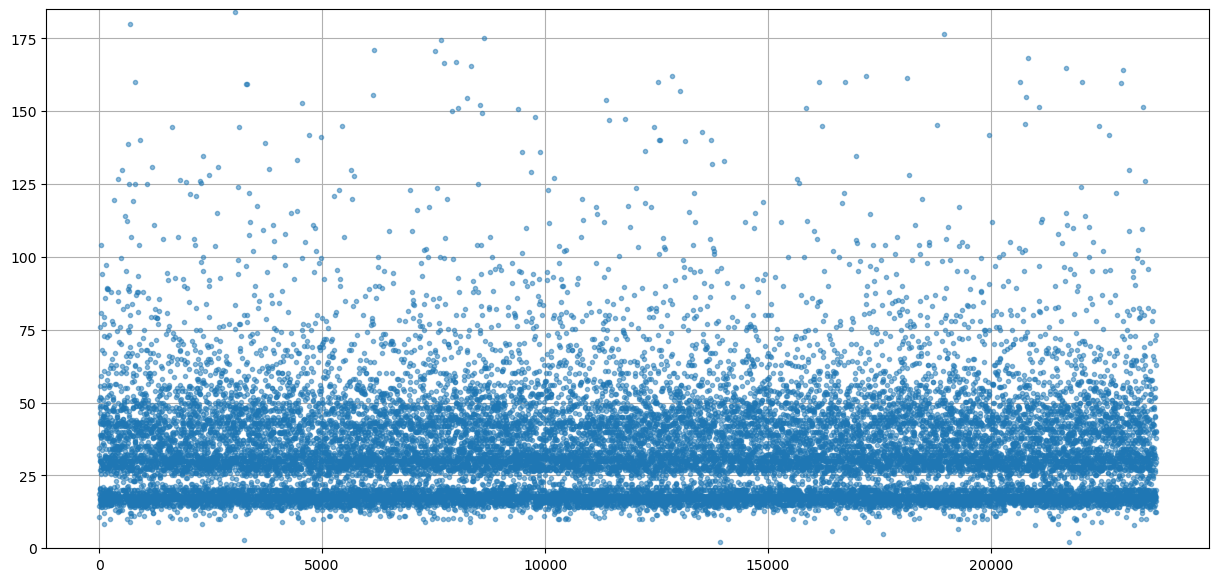

In [59]:
data['living_area'].sort_values().plot(ylim=(0, 185), style='.', grid=True, alpha=0.5, figsize=(15, 7));

- Обработанные данные:

count    23502.000000
mean        33.472286
std         18.231142
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        184.000000
Name: living_area_edit, dtype: float64

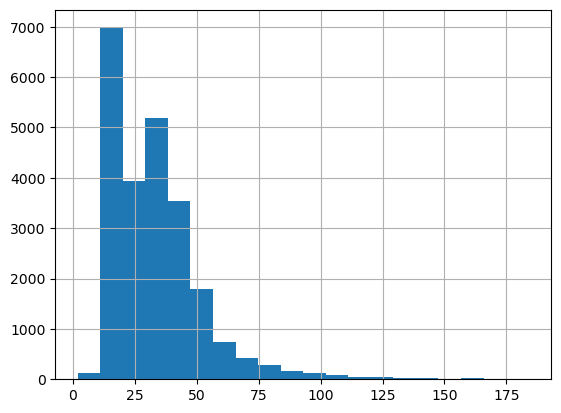

In [60]:
data['living_area_edit'].hist(bins=20)
data['living_area_edit'].describe()

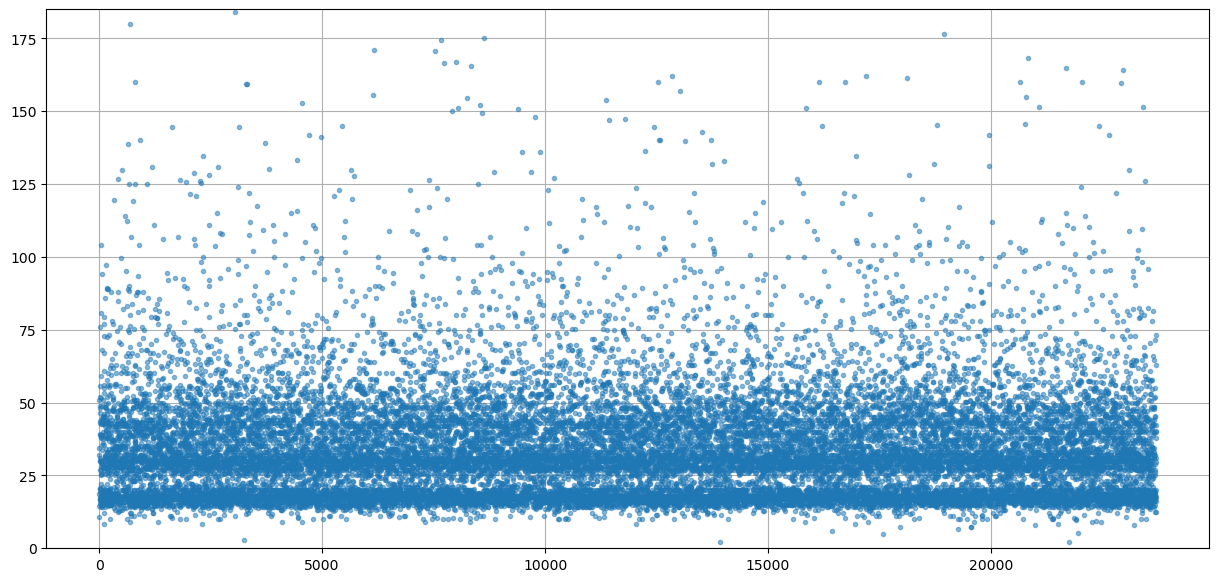

In [61]:
data['living_area_edit'].sort_values().plot(ylim=(0, 185), style='.', grid=True, alpha=0.5, figsize=(15, 7));

Из проведенного анализа видно, что исходные данные (с пропусками в столбцах и аномальными значениями) не имеют значительного отличия от отредактированных данных при общем анализе.  
Наибольшая доля объявлений приходится на квартиры, с жилой площадью от 12м² до 45м², медианным значением общей площади является 30м².

**Столбец 'kitchen_area' (площадь кухни), исходные и отредактированные данные:**

Графически отобразим данные:

- Исходные данные:

count    21250.000000
mean        10.392657
std          5.288323
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         75.000000
Name: kitchen_area, dtype: float64

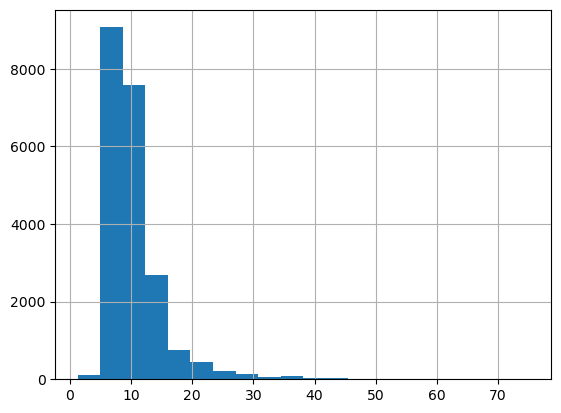

In [62]:
data['kitchen_area'].hist(bins=20)
data['kitchen_area'].describe()

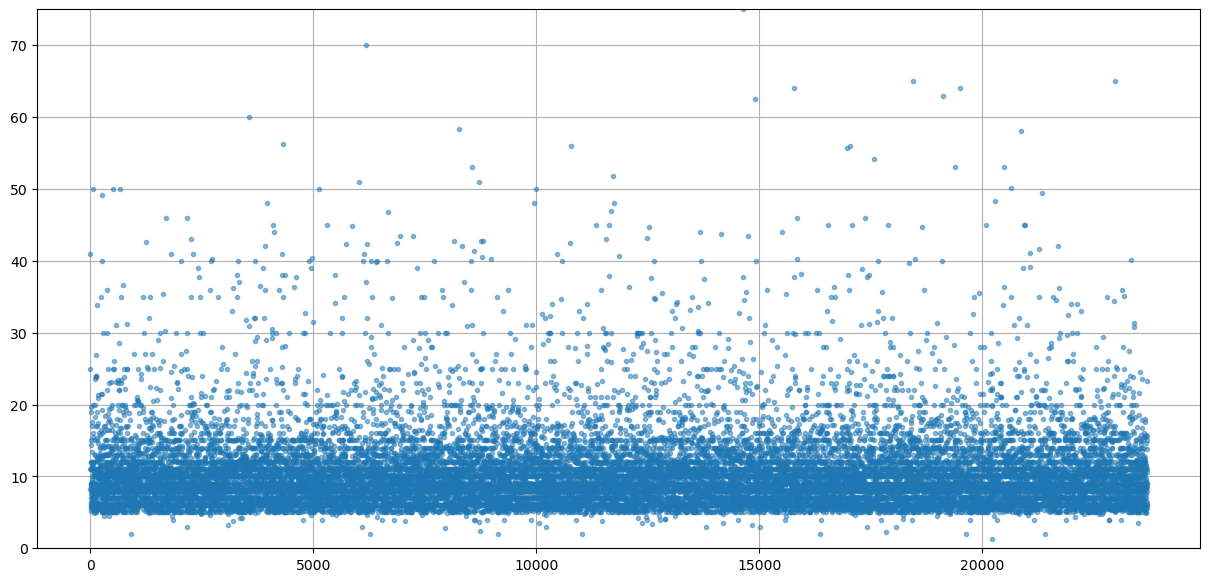

In [63]:
data['kitchen_area'].sort_values().plot(ylim=(0, 75), style='.', grid=True, alpha=0.5, figsize=(15, 7));

- Обработанные данные:

count    23502.000000
mean        10.273278
std          5.037483
min          5.000000
25%          7.300000
50%          9.100000
75%         11.300000
max         75.000000
Name: kitchen_area_edit, dtype: float64

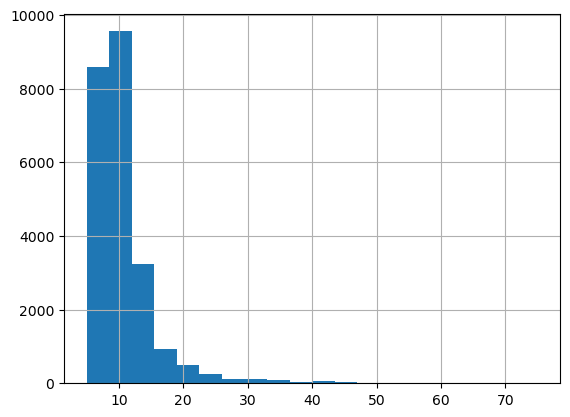

In [64]:
data['kitchen_area_edit'].hist(bins=20)
data['kitchen_area_edit'].describe()

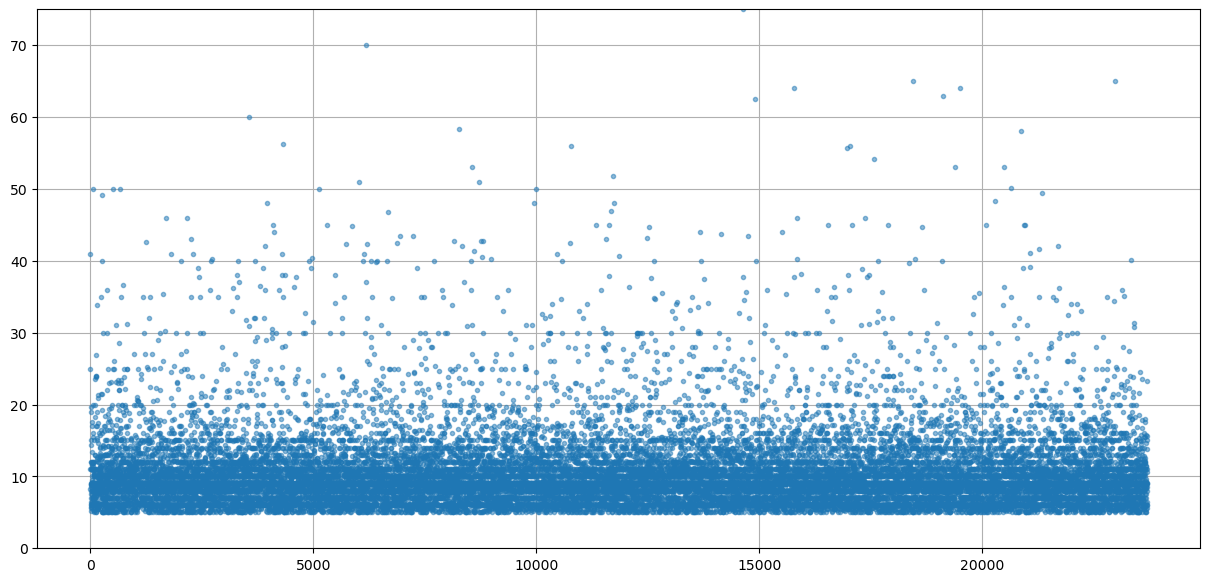

In [65]:
data['kitchen_area_edit'].sort_values().plot(ylim=(0, 75), style='.', grid=True, alpha=0.5, figsize=(15, 7));

Из проведенного анализа видно, что исходные данные (с пропусками в столбцах и аномальными значениями) содержат значительное количество аномально низких показателей (менее 5м²).  
Наибольшая доля объявлений приходится на квартиры, с площадью кухни от 5м² до 15м², медианным значением общей площади является 9м².

**Столбец 'last_price' (цена объекта):**

Для удобства визуализации создаим столбец "last_price_million", в котором цены из "руб." переведны в "млн.руб.":

In [66]:
data['last_price_million'] = data['last_price'] / 1000000

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Разделить все значения на 1 млн - хорошее решение
</div>

Графически отобразим данные:

count    23502.000000
mean         5.926109
std          4.754163
min          0.012190
25%          3.400000
50%          4.600000
75%          6.700000
max         49.900000
Name: last_price_million, dtype: float64

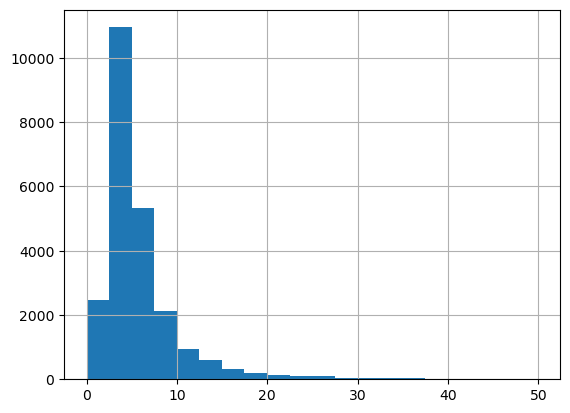

In [67]:
data['last_price_million'].hist(bins=20)
data['last_price_million'].describe()

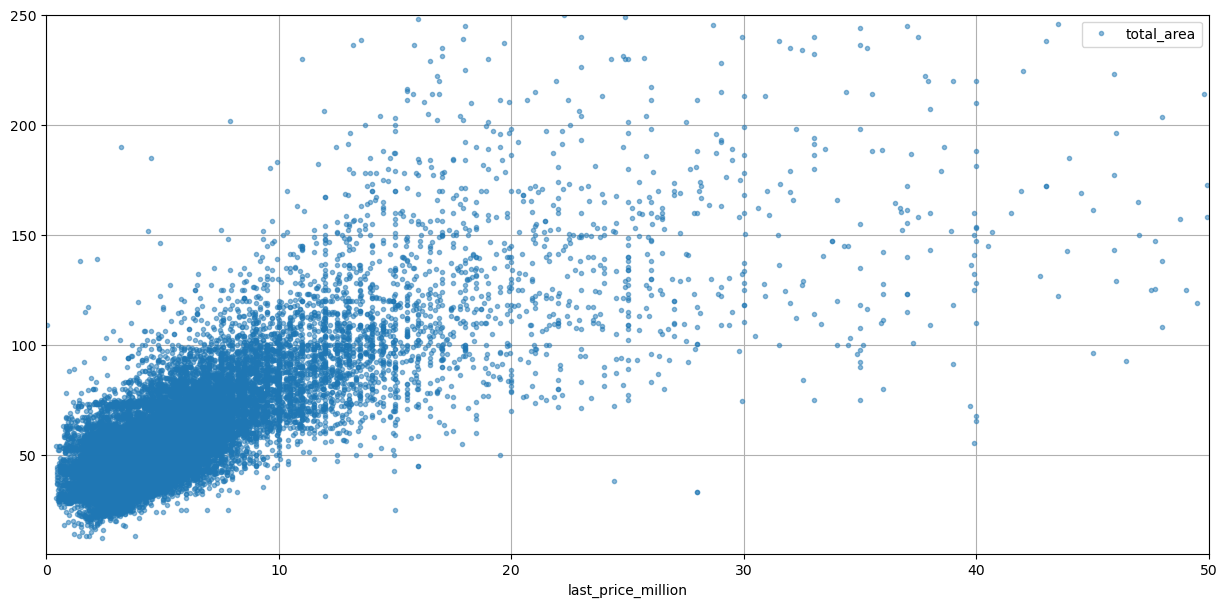

In [68]:
data.sort_values(by='last_price_million').plot(x='last_price_million', y='total_area', style='.', xlim=(0,50), ylim=(5,250), grid=True, alpha=0.5, figsize=(15, 7));

Основной объем объявлений в архиве - квартиры стоимостью до 10 млн. руб. и площадью до 100м²

**Столбец 'rooms' (кол-во комнат), исходные и отредактированные данные:**

Графически отобразим данные:

- Исходные данные:

count    23502.000000
mean         2.044890
std          1.021984
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

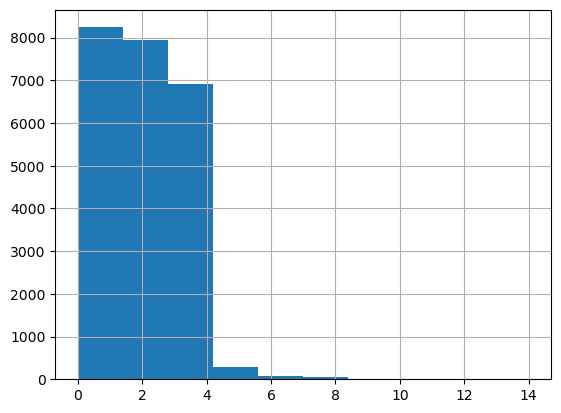

In [69]:
data['rooms'].hist(bins=10)
data['rooms'].describe()

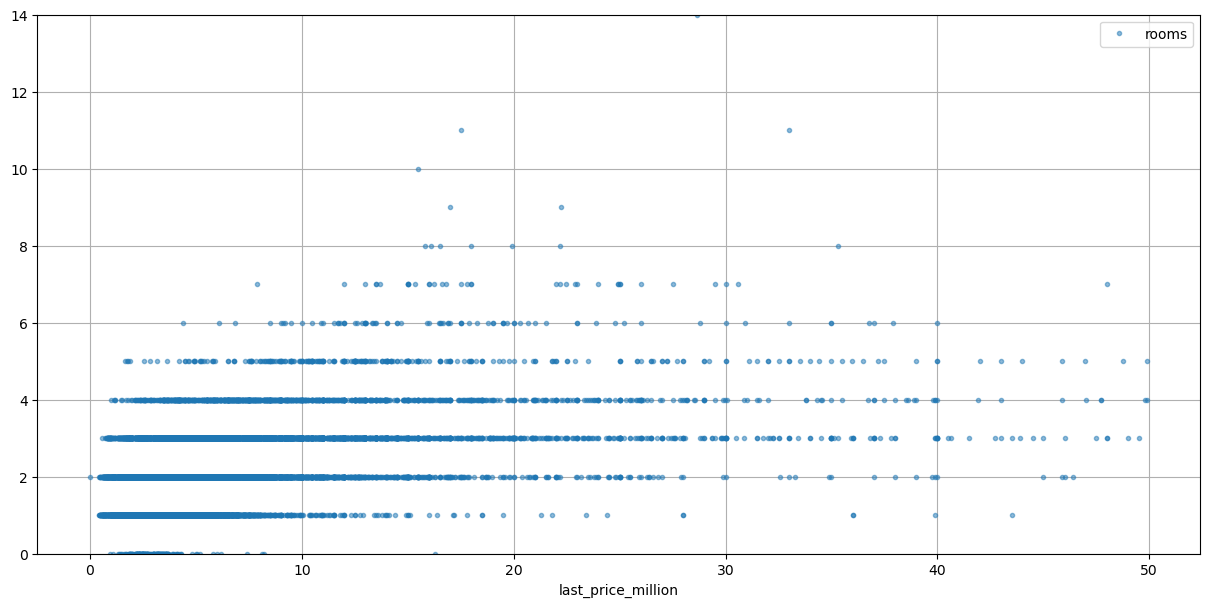

In [70]:
data.sort_values(by='rooms').plot(x='last_price_million', y='rooms', style='.', ylim=(0,14), grid=True, alpha=0.5, figsize=(15, 7));

- Обработанные данные:

Графики по обработанным столбцам отражают более реалистичную картину. Видно, как с увеличением количества комнат, увеличивается и цена объекта.

In [71]:
print(data.head(0))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, rooms_edit, ceiling_height, ceiling_height_edit, floors_total, floors_total_edit, living_area, living_area_edit, floor, is_apartment, is_apartment_edit, studio, open_plan, kitchen_area, kitchen_area_edit, balcony, locality_name, locality_name_edit, airports_nearest, cityCenters_nearest, parks_around3000, parks_around3000_edit, parks_nearest, ponds_around3000, ponds_around3000_edit, ponds_nearest, days_exposition, price_for_1m2, day_exposition, month_exposition, year_exposition, floor_category, cityCenters_nearest_edit, cityCenters_nearest_km, last_price_million]
Index: []

[0 rows x 39 columns]


count    23502.000000
mean         2.054889
std          1.008563
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms_edit, dtype: float64

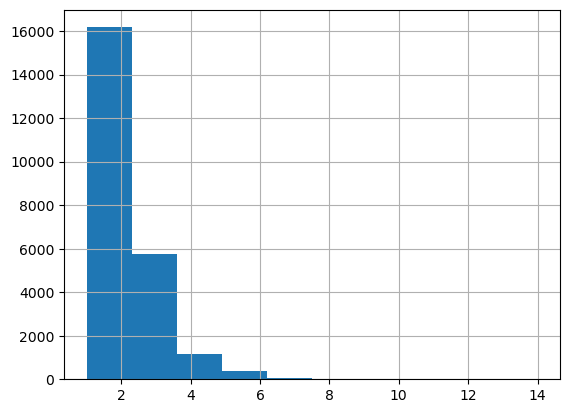

In [72]:
data['rooms_edit'].hist(bins=10)
data['rooms_edit'].describe()

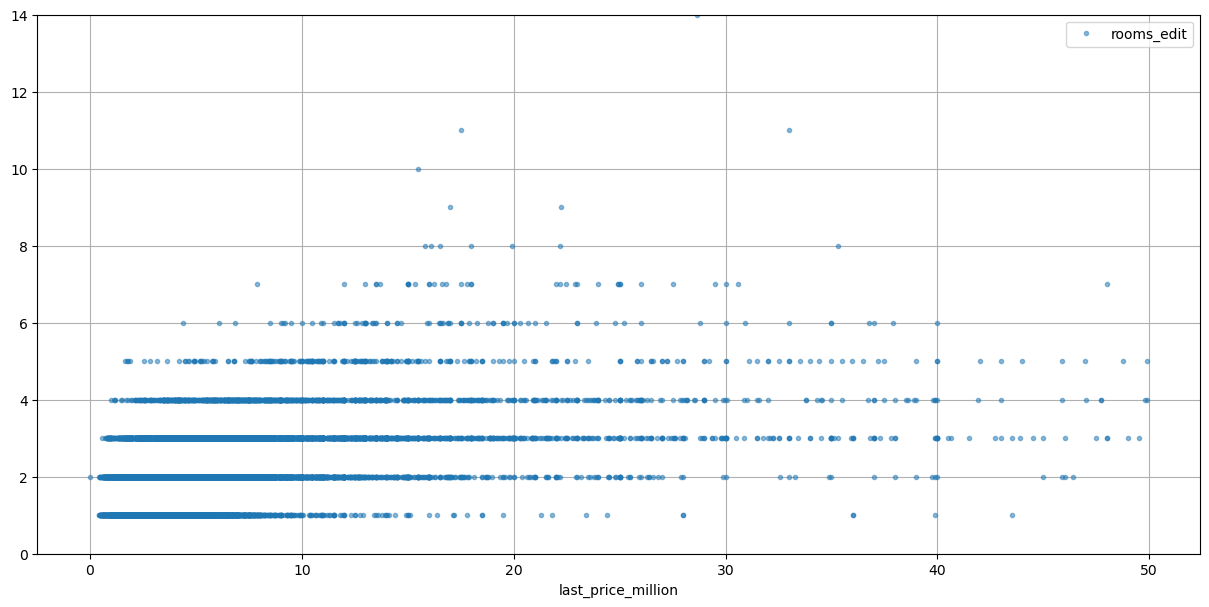

In [73]:
data.sort_values(by='rooms_edit').plot(x='last_price_million', y='rooms_edit', style='.', ylim=(0,14), grid=True, alpha=0.5, figsize=(15, 7));

In [74]:
print(data['rooms_edit'].corr(data['last_price']))

0.49263577003891484


Зависимость комнат от стоимости объекта имеет среднюю  корреляцию, т.к. количество комнат напрямую связано с таким показателем, как общая площадь помещения.

**Столбец 'ceiling_height' (высота потолков), исходные и отредактированные данные:**

Графически отобразим данные:

- Исходные данные:

count    14379.000000
mean         2.765959
std          1.263927
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

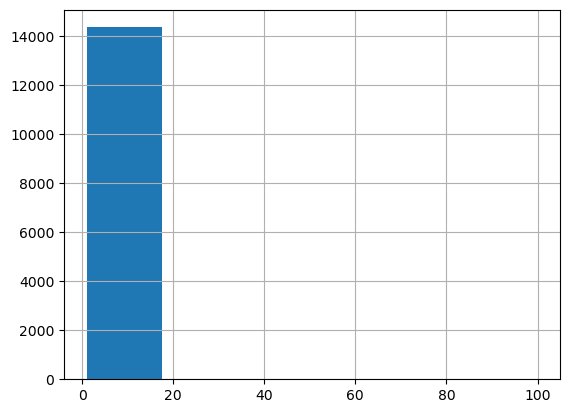

In [75]:
data['ceiling_height'].hist(bins=6)
data['ceiling_height'].describe()

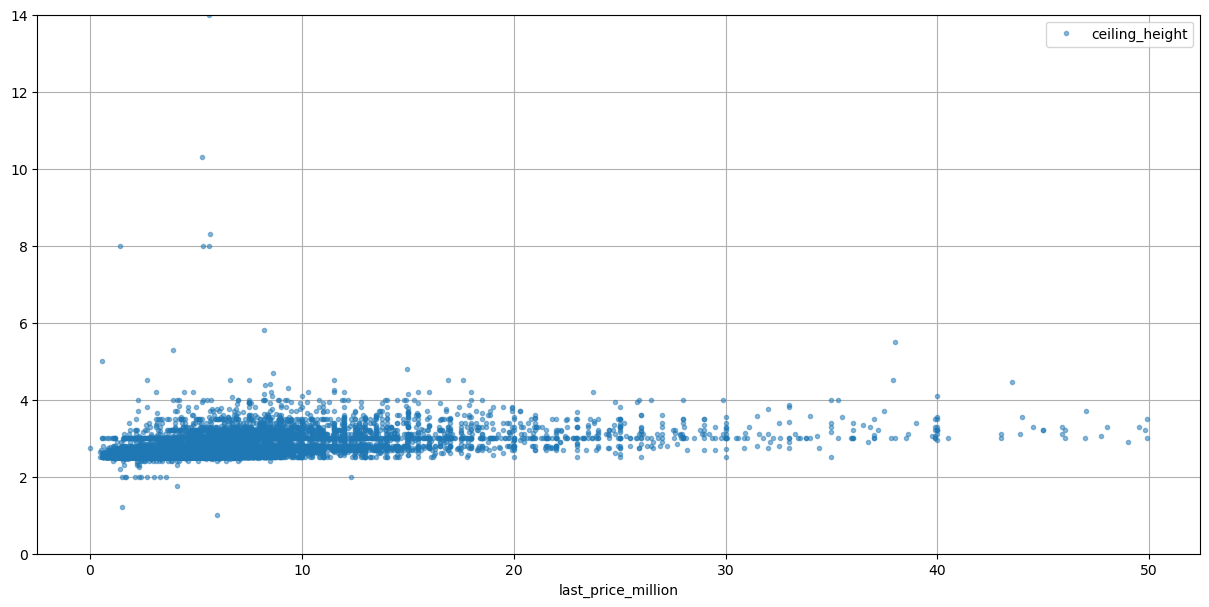

In [76]:
data.sort_values(by='ceiling_height').plot(x='last_price_million', y='ceiling_height', style='.', ylim=(0,14), grid=True, alpha=0.5, figsize=(15, 7));

- Обработанные данные:

count    23502.000000
mean         2.741965
std          0.231715
min          2.000000
25%          2.600000
50%          2.771499
75%          2.771499
max         10.300000
Name: ceiling_height_edit, dtype: float64

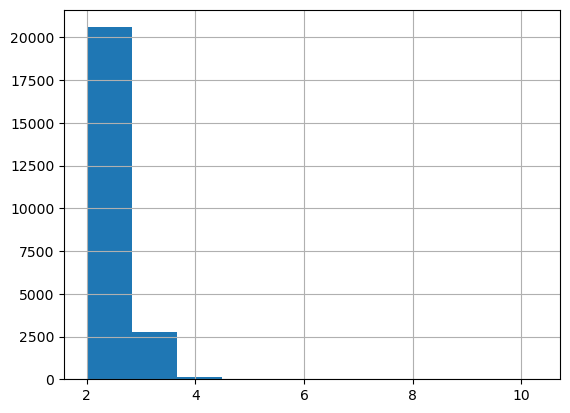

In [77]:
data['ceiling_height_edit'].hist(bins=10)
data['ceiling_height_edit'].describe()

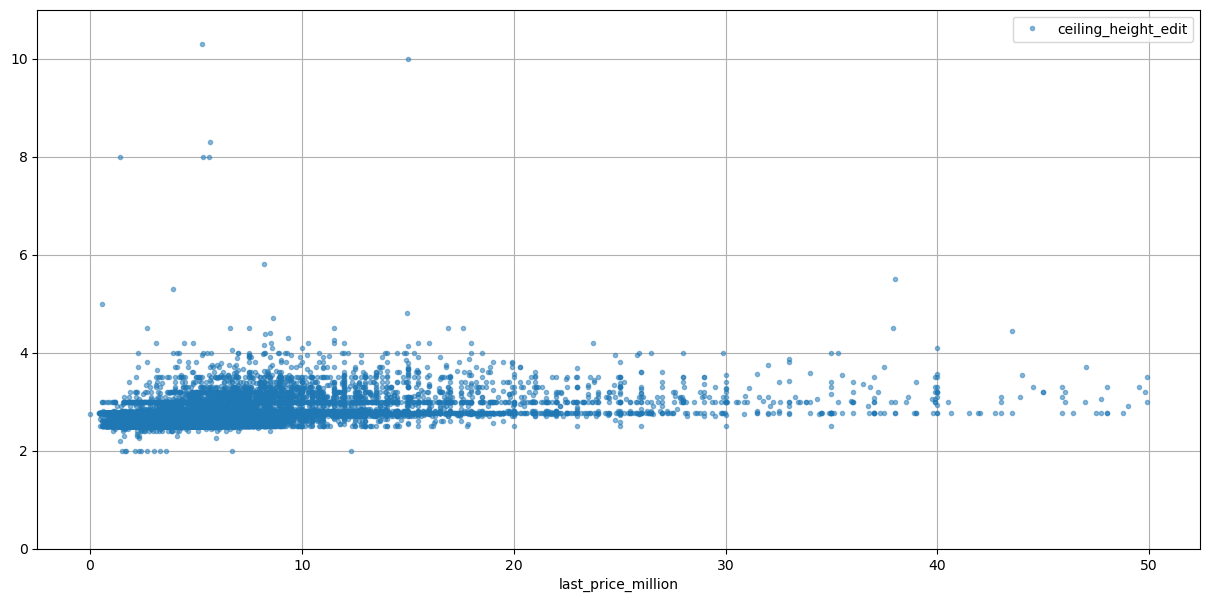

In [78]:
data.sort_values(by='ceiling_height_edit').plot(x='last_price_million', y='ceiling_height_edit', style='.', ylim=(0,11), grid=True, alpha=0.5, figsize=(15, 7));

Исходные (не обработанные) данные неинформативны, имеют выбросы, и не отражают реальной картины представленных данных.  
По графикам видна низкая зависимость между высотой потолков и ценой объекта, что также подтверждается низким уровнем корреляции:

In [79]:
print(data['ceiling_height_edit'].corr(data['last_price']))

0.3610693335337539


**Столбец 'floor' (этаж квартиры):**

Графически отобразим данные:

count    23502.000000
mean         5.897881
std          4.894021
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

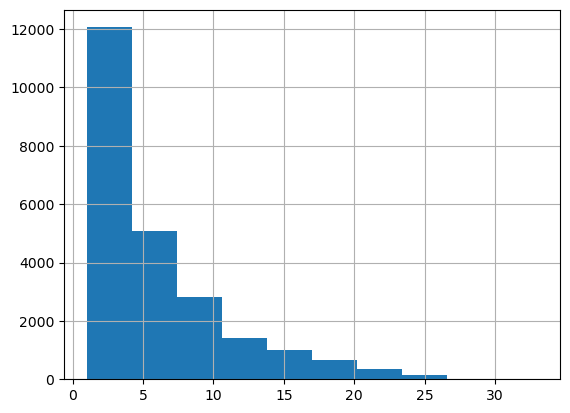

In [80]:
data['floor'].hist(bins=10)
data['floor'].describe()

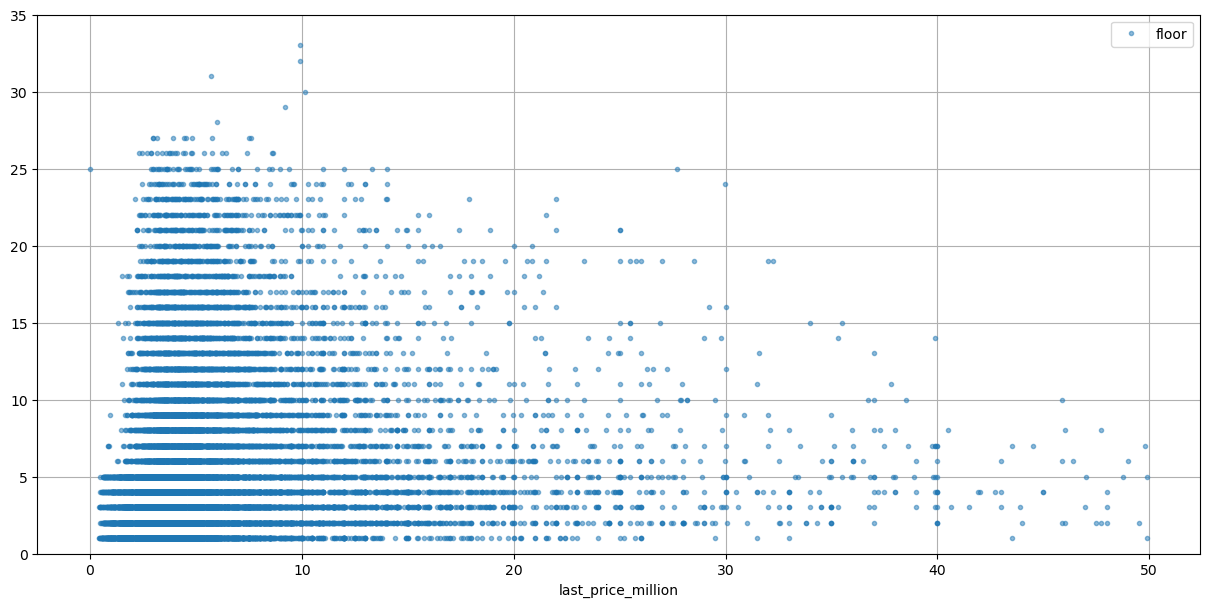

In [81]:
data.sort_values(by='floor').plot(x='last_price_million', y='floor', style='.', ylim=(0,35), grid=True, alpha=0.5, figsize=(15, 7));

Большинство квартир в объявлених расположены с 1 по 5 этаж (вероятно, потому что основная застройка в городах - "пятиэтажки").

Корреляция между этажом квартиры и её стоимостью практически отсутствует.

In [82]:
print(data['floor'].corr(data['last_price']))

0.05717099262128952


**Столбец 'floor_category' (тип этажа квартиры):**

Графически отобразим данные:

count      23502
unique         3
top       другой
freq       17237
Name: floor_category, dtype: object

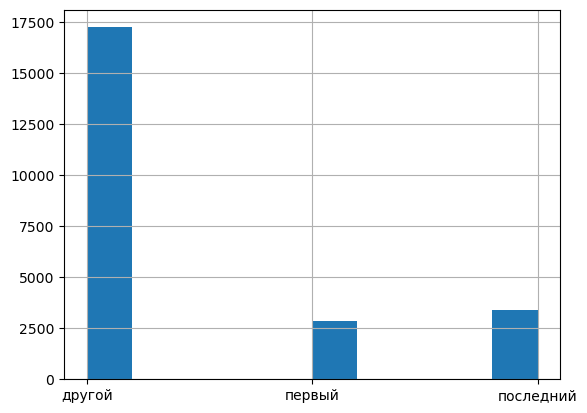

In [83]:
data['floor_category'].hist(bins=10)
data['floor_category'].describe()

Из представленных данных видно, что меньше всего объявлений с квартирами на первом этаже, чуть больше на последнем. Подавляющее большинство объявлений расположены в категории "других" этажей.

In [84]:
print(data.pivot_table(index='floor_category', values='last_price', aggfunc=['median', 'mean']).round(0))

                   median       mean
               last_price last_price
floor_category                      
другой          4800000.0  6182861.0
первый          3900000.0  4594729.0
последний       4300000.0  5749731.0


Без привязки к иным характеристикам, квартиры на первом и последнем этажах значительно дешевле, чем квартиры, расположенные на "других" этажах.

**Столбец 'floors_total' (общее количество этажей в доме), исходные и отредактированные данные:**

Графически отобразим данные:

- Исходные данные:

count    23417.000000
mean        10.699748
std          6.593931
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         37.000000
Name: floors_total, dtype: float64

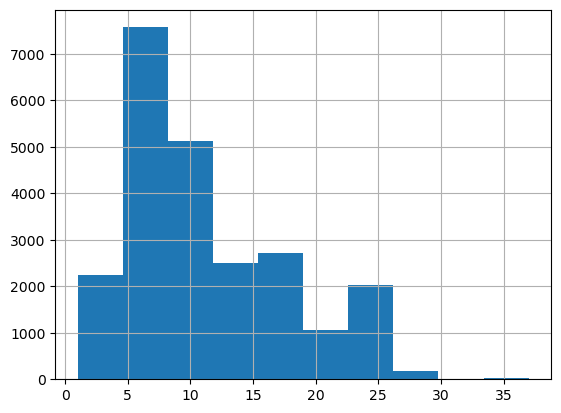

In [85]:
data['floors_total'].hist(bins=10)
data['floors_total'].describe()

Из представленных данных видно, что основной объем квартир расположены в пяти - десяти этажных домах.

In [86]:
print(data['floors_total_edit'].corr(data['last_price']))

0.04437229316506114


Корреляция между количеством этажей в доме и ценой объекта практически отсутствует.

- Обработанные данные:

count    23502.000000
mean        10.701472
std          6.605954
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total_edit, dtype: float64

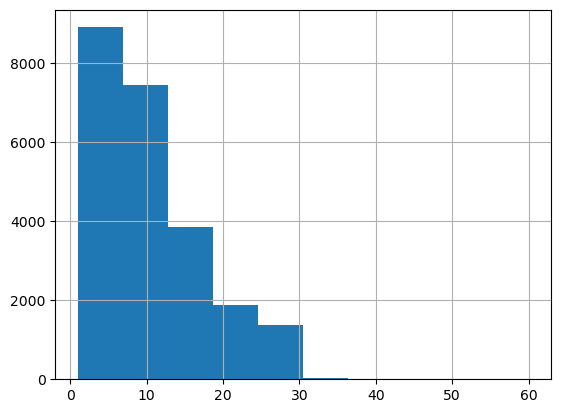

In [87]:
data['floors_total_edit'].hist(bins=10)
data['floors_total_edit'].describe()

Обработанные данные выглядят более реалистично, при этом, количество этажей в доме практически не оказывает влияния на иные показатели.

In [88]:
print(data['floors_total'].corr(data['last_price']))

0.04474386684156623


Корреляция между количеством этажей в доме и ценой объекта практически отсутствует.

**Столбец 'cityCenters_nearest' (расстояние до центра города), исходные и отредактированные данные:**

Графически отобразим данные:

- Исходные данные:

count    17986.000000
mean     14279.616313
std       8596.959385
min        181.000000
25%       9423.500000
50%      13149.000000
75%      16333.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

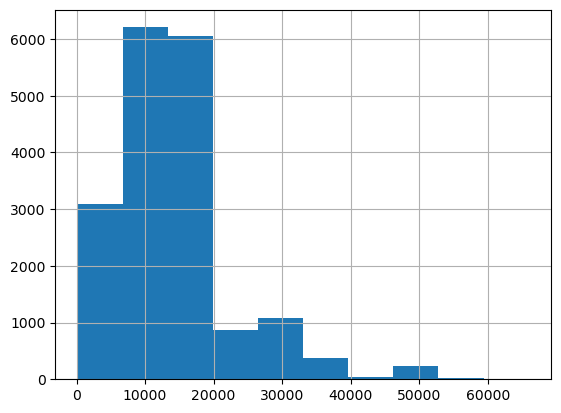

In [89]:
data['cityCenters_nearest'].hist(bins=10)
data['cityCenters_nearest'].describe()

Из представленных данных видно, что основной объем квартир расположен на расстоянии от 8,5 до 20 км. до центра города.

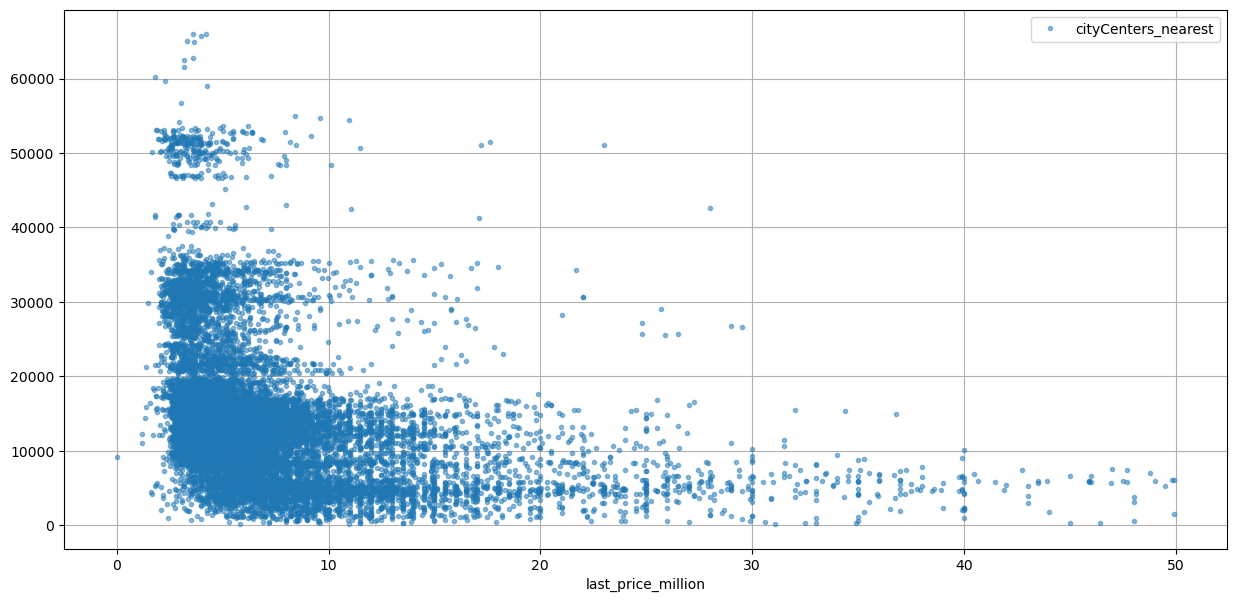

In [90]:
data.sort_values(by='cityCenters_nearest').plot(x='last_price_million', y='cityCenters_nearest', style='.', grid=True, alpha=0.5, figsize=(15, 7));

Из представленных данных видно, что основной объем квартир, расположенных на расстоянии от 8,5 до 20 км. до центра города, имеют стоимость до 12 млн.руб.

In [91]:
print(data['cityCenters_nearest'].corr(data['last_price']))

-0.3365199377191448


Корреляция между расстоянием до центра города и ценой объекта имеет отрицательный характер, при увеличении расстояния уменьшается цена, и наоборот.

**Столбец 'airports_nearest' (расстояние до аэропорта), исходные и отредактированные данные:**

Графически отобразим данные:

count    17965.000000
mean     28814.365488
std      12676.373244
min       6450.000000
25%      18522.000000
50%      26766.000000
75%      37348.000000
max      84869.000000
Name: airports_nearest, dtype: float64

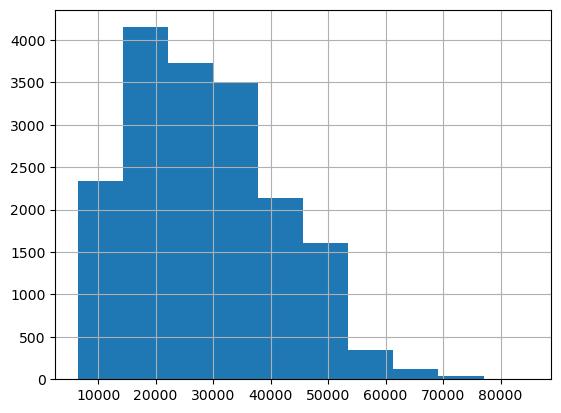

In [92]:
data['airports_nearest'].hist(bins=10)
data['airports_nearest'].describe()

Из представленных данных видно, что основной объем квартир из объявлений располагается на расстоянии от 14 до 38 км. от аэропорта.

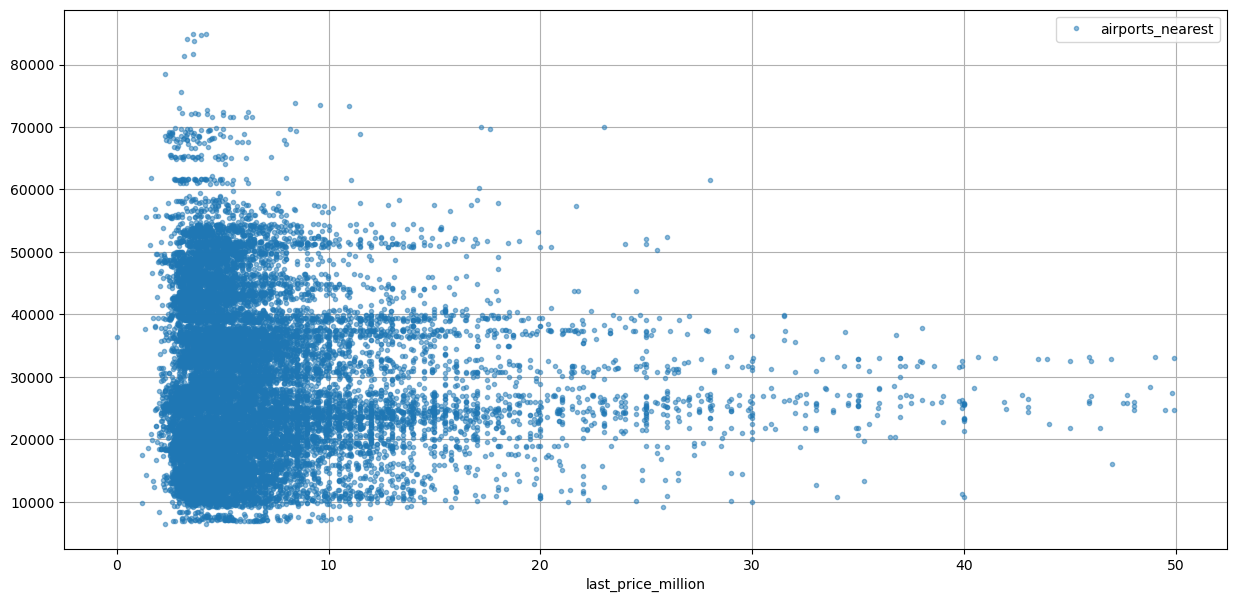

In [93]:
data.sort_values(by='airports_nearest').plot(x='last_price_million', y='airports_nearest', style='.', grid=True, alpha=0.5, figsize=(15, 7));

Из представленных данных видно, что основной объем квартир, расположенных на расстоянии от 14 до 38 км. от аэропорта, имеют стоимость до 9 млн.руб.

In [94]:
print(data['airports_nearest'].corr(data['last_price']))

-0.03752941292740478


Корреляция между расстоянием до аэропорта и ценой объекта практически отсутствует.

**Столбец 'parks_nearest' (расстояние до парка), исходные и отредактированные данные:**

Графически отобразим данные:

count    7942.000000
mean      492.388315
std       342.376745
min        10.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

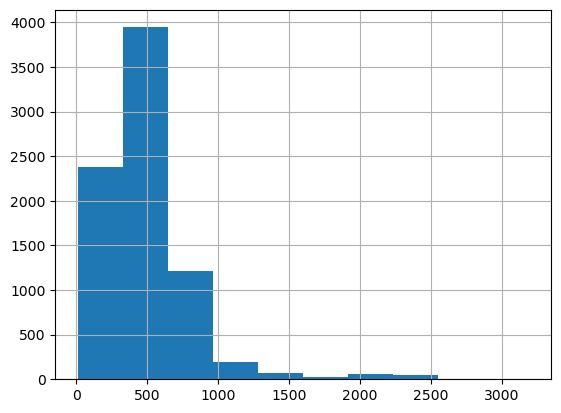

In [95]:
data['parks_nearest'].hist(bins=10)
data['parks_nearest'].describe()

Из представленных данных видно, что основной объем квартир из объявлений располагается на расстоянии от 300 до 600 м. от ближайшего парка.

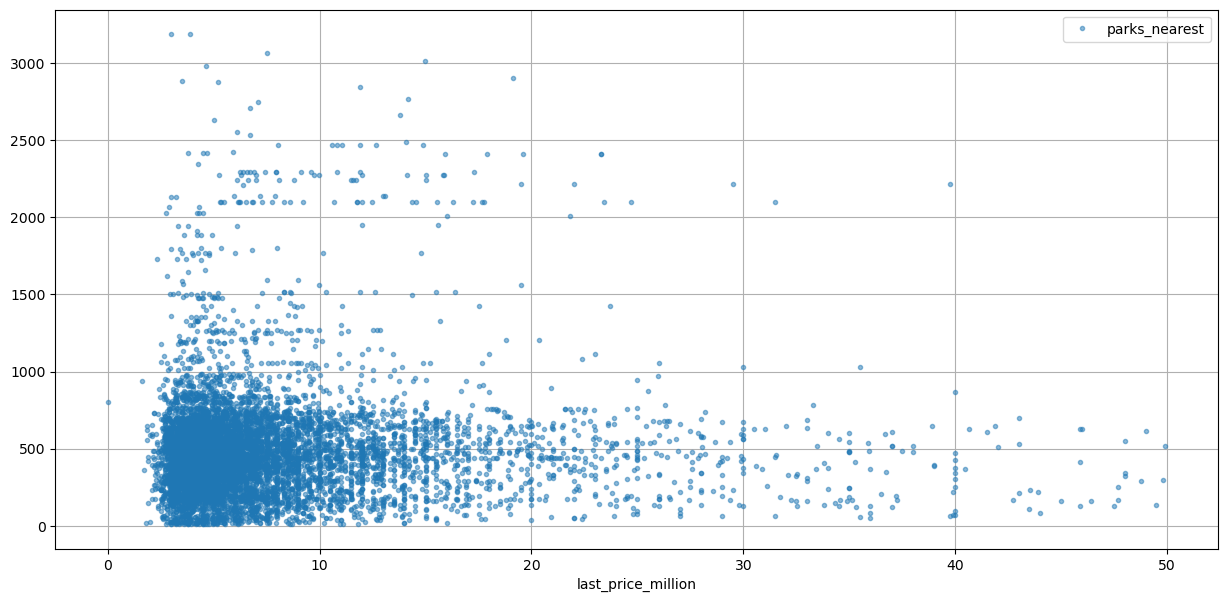

In [96]:
data.sort_values(by='parks_nearest').plot(x='last_price_million', y='parks_nearest', style='.', grid=True, alpha=0.5, figsize=(15, 7));

Из представленных данных видно, что основной объем квартир, расположенных на расстоянии от 300 до 600 м. от ближайшего парка, имеют стоимость до 8 млн.руб.

In [97]:
print(data['parks_nearest'].corr(data['last_price']))

0.008485775943627106


Корреляция между расстоянием до ближайшего парка и ценой объекта практически отсутствует.

**Столбцы 'day_exposition', 'months_exposition', 'year_exposition' (день/месяц/год публикации):**

count    23502.000000
mean         2.567909
std          1.789591
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_exposition, dtype: float64

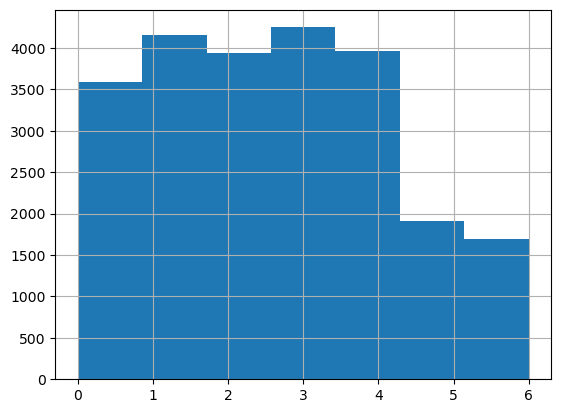

In [98]:
data['day_exposition'].hist(bins=7)
data['day_exposition'].describe()

count    23502.000000
mean         6.399753
std          3.491102
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

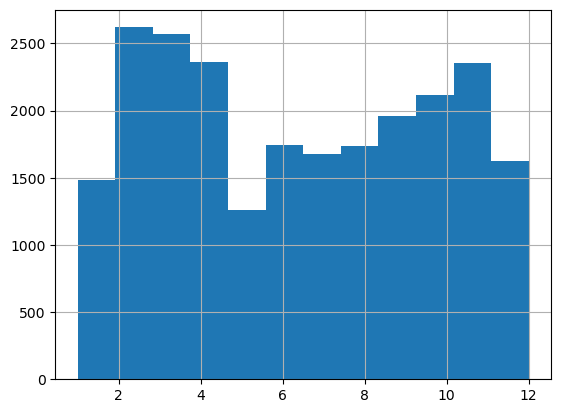

In [99]:
data['month_exposition'].hist(bins=12)
data['month_exposition'].describe()

count    23502.000000
mean      2017.370479
std          1.037061
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_exposition, dtype: float64

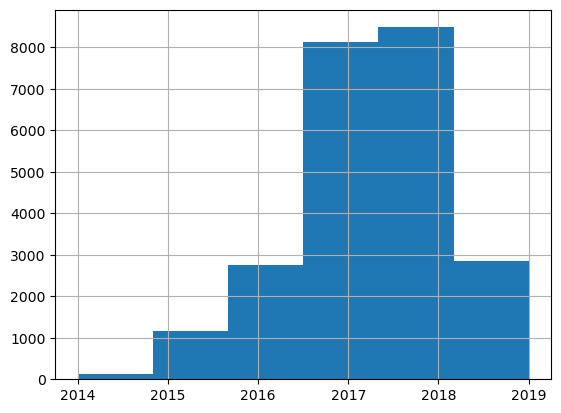

In [100]:
data['year_exposition'].hist(bins=6)
data['year_exposition'].describe()

Из представленных данных видно, что объявления публикуются преимущественно в будние дни (более чем в 2 больше кол-во публикаций).  
Также объявления чаще (примерно в 2 раза) публикуются весной (март, апрель, май), а также в ноябре.  
Одновременно с этим, больше всего объявлений было опубликовано начиная с середины 2016 года и до начала 2018 года (более 8 тысяч объявлений в год).

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

#### Изучим, как быстро продавались квартиры. 

На основании столбца 'days_exposition' (количество дней, которое продавалась квартира), посмотрим как быстро в среднем продавались квартиры:

<AxesSubplot:>

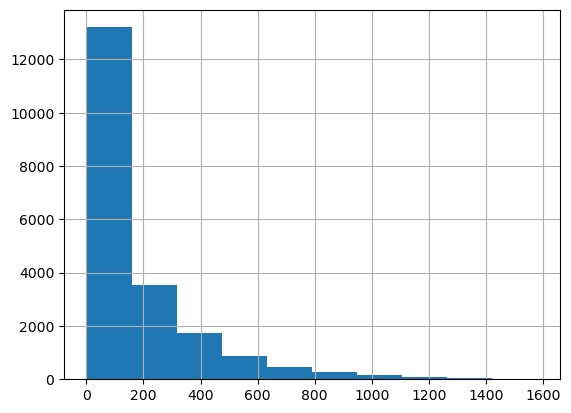

In [101]:
data['days_exposition'].hist()

Рассмотрим данные в столбце 'days_exposition':

In [102]:
data['days_exposition'].describe()

count    20364.000000
mean       179.926242
std        218.827231
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

- среднее арифметическое кол-во дней: 180
- медианное кол-во дней: 95

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

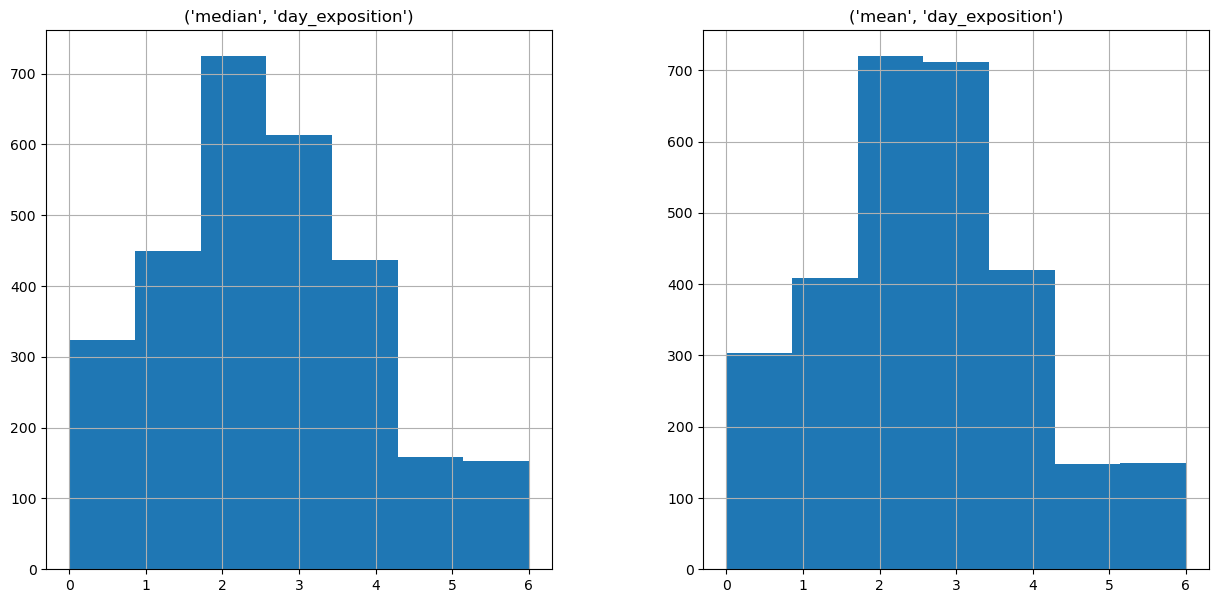

In [103]:
data.pivot_table(index='last_price', values='day_exposition', aggfunc=['median', 'mean']).round(0).hist(bins=7, figsize=(15, 7));

На основании проведенного анализа мы видим, что объявления, опубликованные в середине недели (среда-четверг), имеют более высокую цену.

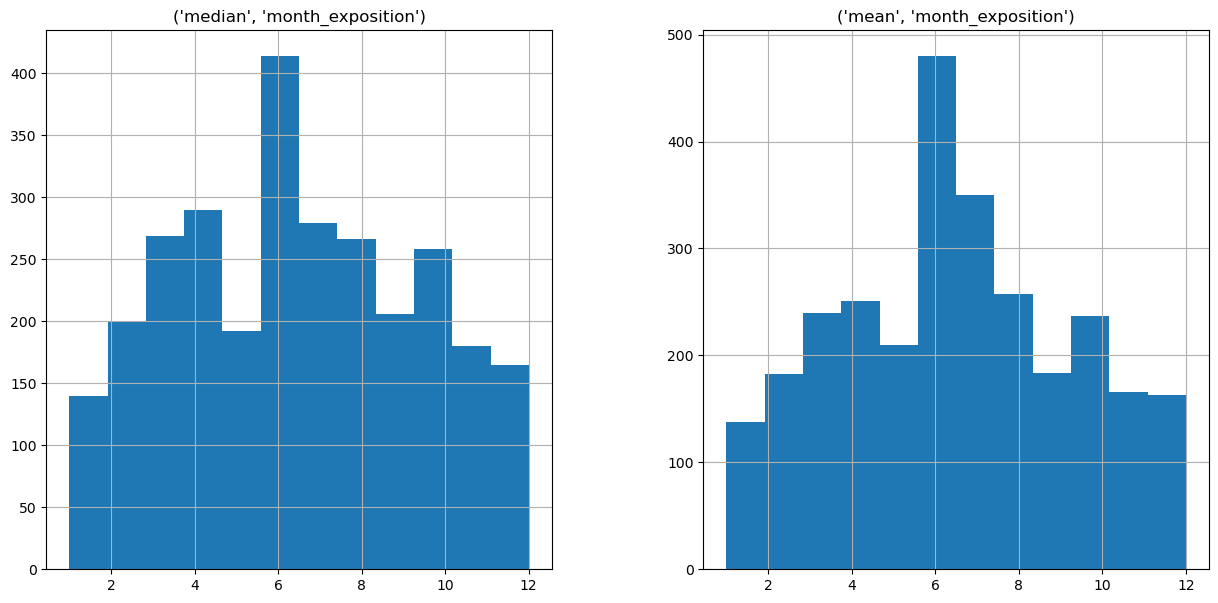

In [104]:
data.pivot_table(index='last_price', values='month_exposition', aggfunc=['median', 'mean']).round(0).hist(bins=12, figsize=(15, 7));

На основании проведенного анализа мы видим, что объявления, опубликованные летом (июнь, июль, август), а также весной (март, апрель) имеют более высокую цену.

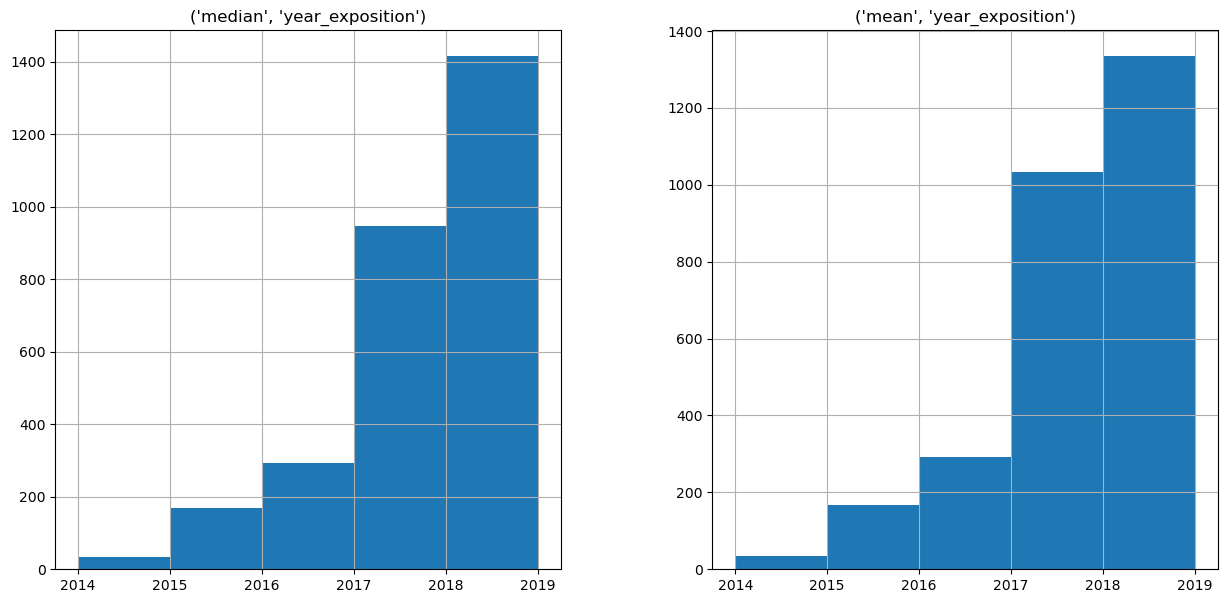

In [105]:
data.pivot_table(index='last_price', values='year_exposition', aggfunc=['median', 'mean']).round(0).hist(bins=5, figsize=(15, 7));

На основании проведенного анализа мы видим значительный рост стоимости квартир с каждым годом.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Для дня, месяца и года продажи нужно построить barplot или гистограмму рассчитав среднее значение или медиану, так как ты сделал для категории этажа (ячейка 84). После этого необходимо написать о зависимости цены от этих параметров
	
    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br>Исправил
</div>


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v3:</b> 
<br>Не совсем такПострой сводную таблицу методом pivot_table, в index передай floor_category, в values общую цену, в aggfunc медиану. К этой таблице примени .plot.bar(). По аналогии сделай для всех трёх времен) Не забудь добавить выводы
</div>

<AxesSubplot:xlabel='day_exposition'>

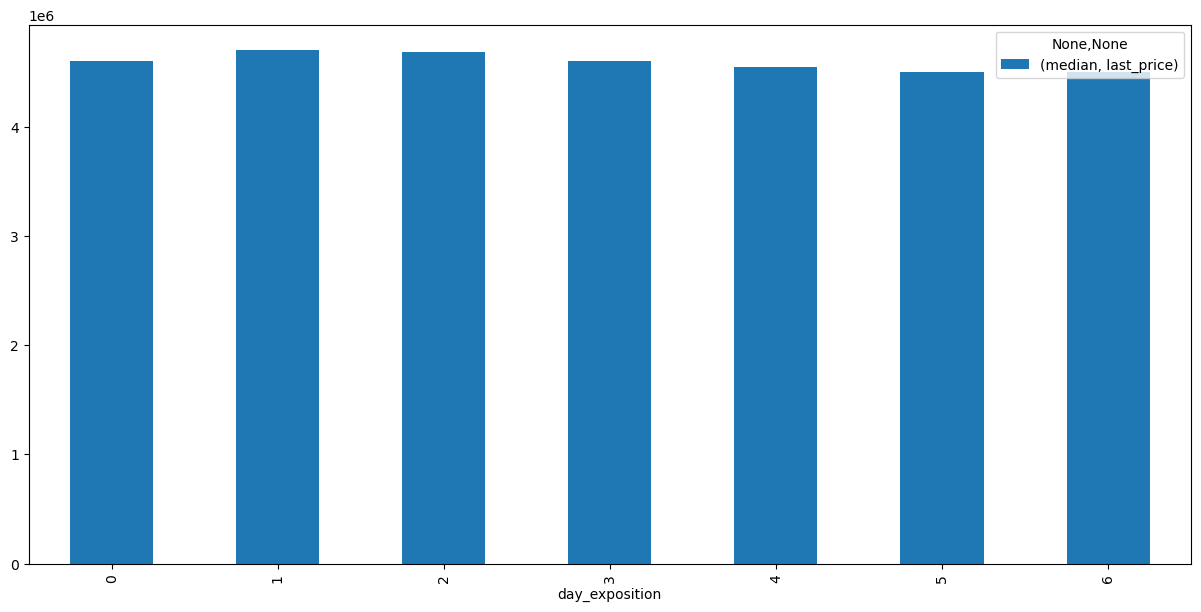

In [106]:
data.pivot_table(index='day_exposition', values='last_price', aggfunc=['median']).plot.bar(figsize=(15,7))

<AxesSubplot:xlabel='month_exposition'>

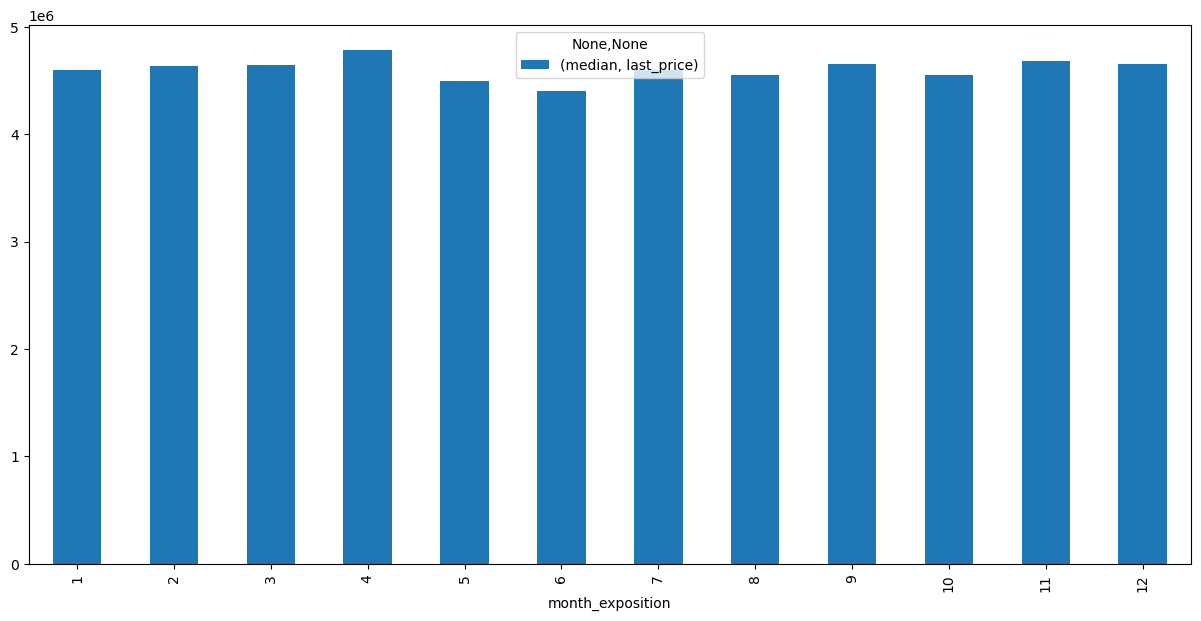

In [107]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc=['median']).plot.bar(figsize=(15,7))

<AxesSubplot:xlabel='year_exposition'>

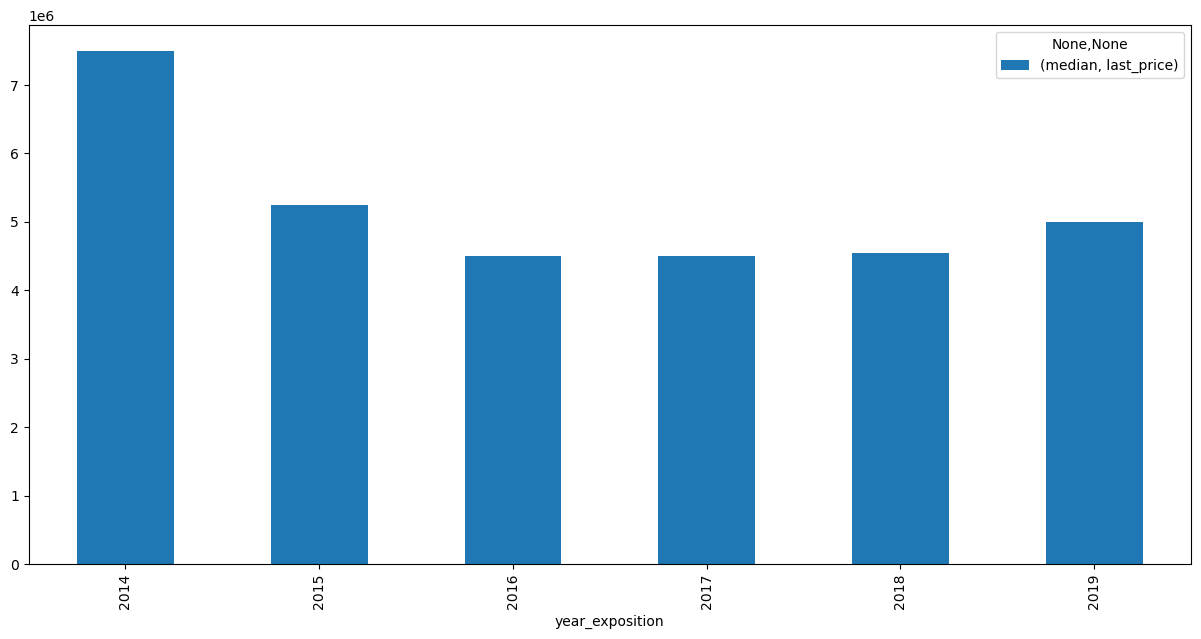

In [108]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc=['median']).plot.bar(figsize=(15,7))

Данный анализ показывает, что день и месяц публикации не оказывают значительного влияния на цену квартиры.  
С 2014 по 2016 годы наблюдается тенденция на уменьшение стоимости квартир. В 2017-2018 годах началась положительная динамика на увеличение цены квартир.

<div class="alert alert-info">
<b>Комментарий студента v3:</b>
<br>Изменил
</div>


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v4:</b>
<br>Правка выполнена 👍
</div>

#### Изучим факторы, больше всего влияющие на общую (полную) стоимость объекта:

*Проверим корреляцию между покзатаелями:*  
**- "цена квартиры" и "общая площадь квартиры":**

In [109]:
print(data['last_price'].corr(data['total_area']))

0.7777021013829615


Корреляция довольно высока, значит от увеличения общей площади квартиры увеличивается её стоимость, однако, данное правило не является константой, т.к. стоимость квартиры зависит еще от множества других параметров.

*Проверим корреляцию между покзатаелями:*  
**- "цена квартиры" и "жилая площадь квартиры":**

In [110]:
print(data['last_price'].corr(data['living_area_edit']))

0.6792384968159271


Корреляция довольно высока, значит от увеличения жилой площади квартиры увеличивается её стоимость, однако, данное правило не является константой, т.к. стоимость квартиры зависит еще от множества других параметров. При этом, показатель "жилая площадь" тесно связан с общей площадью квартиры и зависит от него (корреляция между показателями - 0,93)

*Проверим корреляцию между покзатаелями:*  
**- "цена квартиры" и "жилая площадь квартиры":**

In [111]:
print(data['last_price'].corr(data['kitchen_area_edit']))

0.5672698388018699


Корреляция между показателями выше средней, значит от увеличения площади кухни, стоимость квартиры увеличивается.

*Проверим корреляцию между покзатаелями:*  
**- "цена квартиры" и "кол-во комнат":**

In [112]:
print(data['last_price'].corr(data['rooms_edit']))

0.49263577003891484


Корреляция между показателями ниже средней, значит от увеличения кол-ва комнат, стоимость квартиры увеличивается незначительно. 

*Проверим корреляцию между покзатаелями:*  
**- "цена квартиры" и "тип этажа":**

In [113]:
print(data.pivot_table(index='floor_category', values='last_price', aggfunc='median'))

                last_price
floor_category            
другой           4800000.0
первый           3900000.0
последний        4300000.0


В среднем, самыми дешевыми являются квартиры, расположенные на первом этаже. Далее идут квартиры, расположенные на послежнем этаже - немного дороже (примерно на 10%). А квартиры, расположенные на "другом" этаже (ни первый, ни последний), стоят дороже всего.

*Проверим корреляцию между покзатаелями:*  
**- "цена квартиры" и "даты публикации объявления":**

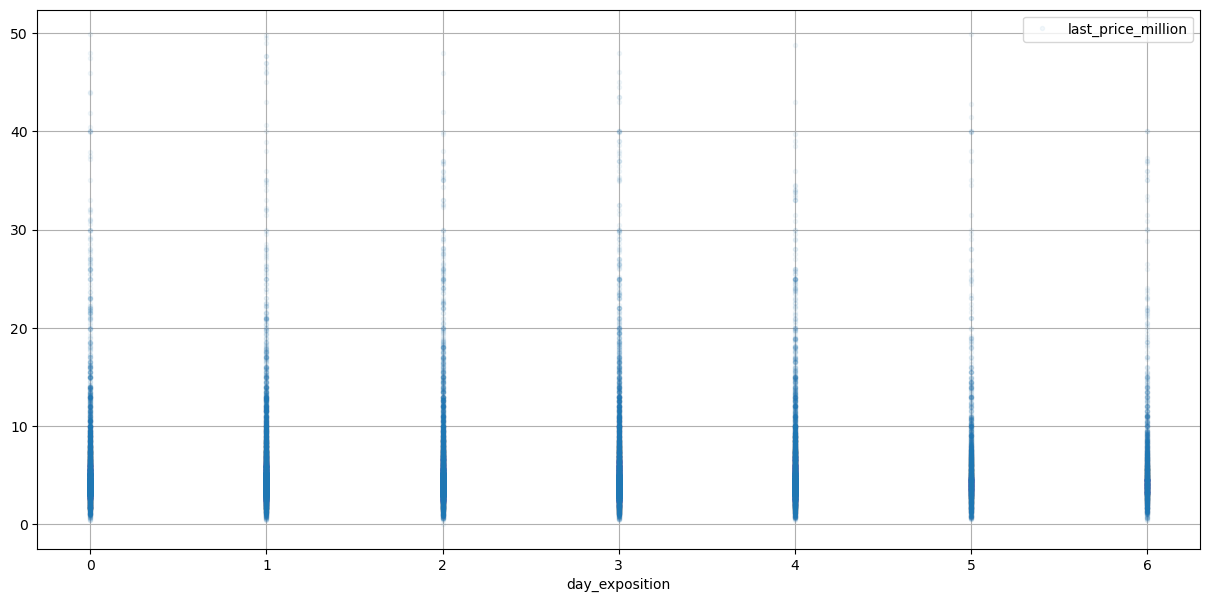

In [114]:
data.sort_values(by='day_exposition').plot(x='day_exposition', y='last_price_million', style='.', grid=True, alpha=0.05, figsize=(15, 7));

В среднем, день публикации объявления не оказывает влияния на стоимость квартиры. При этом, согласно графику, объявления, публикуемые в выходные дни, имеют более низкую цену.

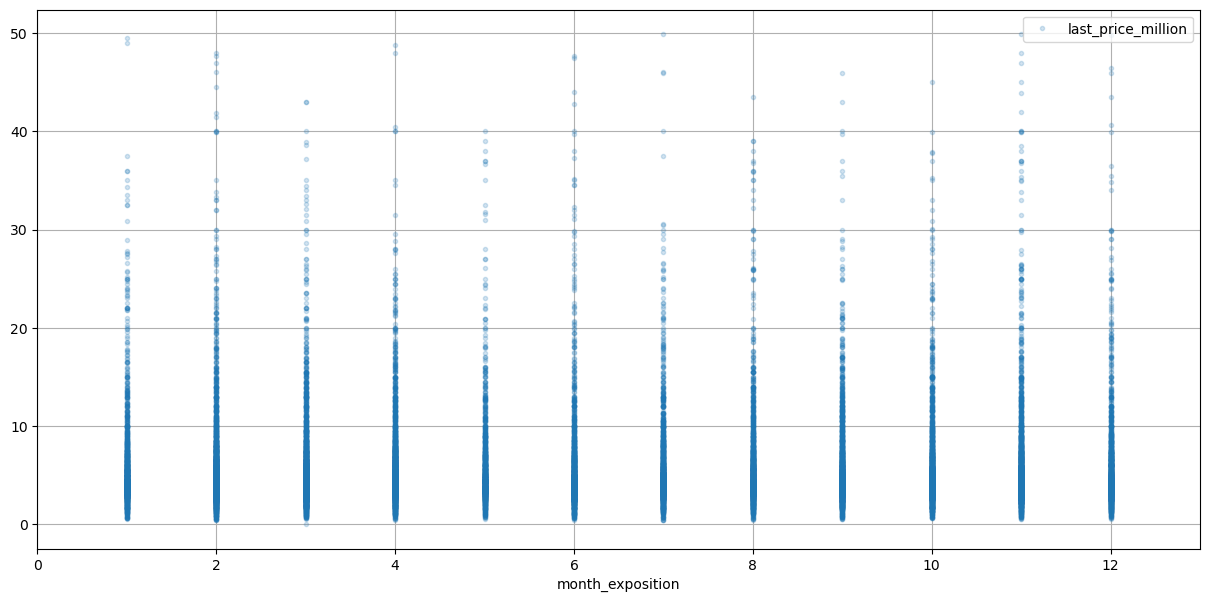

In [115]:
data.sort_values(by='month_exposition').plot(x='month_exposition', y='last_price_million', xlim=(0,13), style='.', grid=True, alpha=0.2, figsize=(15, 7));

Месяц публикации объявления оказывает влияние на стоимость квартиры. Согласно графику, объявления, публикуемые с февраля по апрель, и с сентября по ноябрь, имеют более высоку цену.

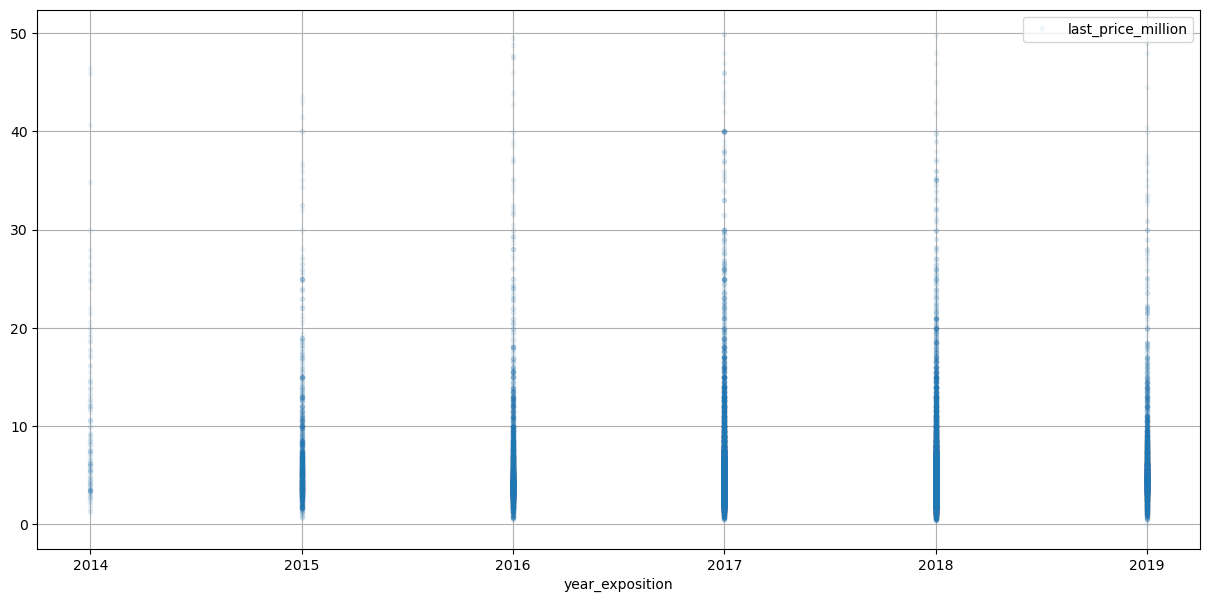

In [116]:
data.sort_values(by='year_exposition').plot(x='year_exposition', y='last_price_million', style='.', grid=True, alpha=0.05, figsize=(15, 7));

Год публикации объявления оказывает решающее влияние на стоимость квартиры. Согласно графику, с каждым годом стоимость квартир увеличивалась.

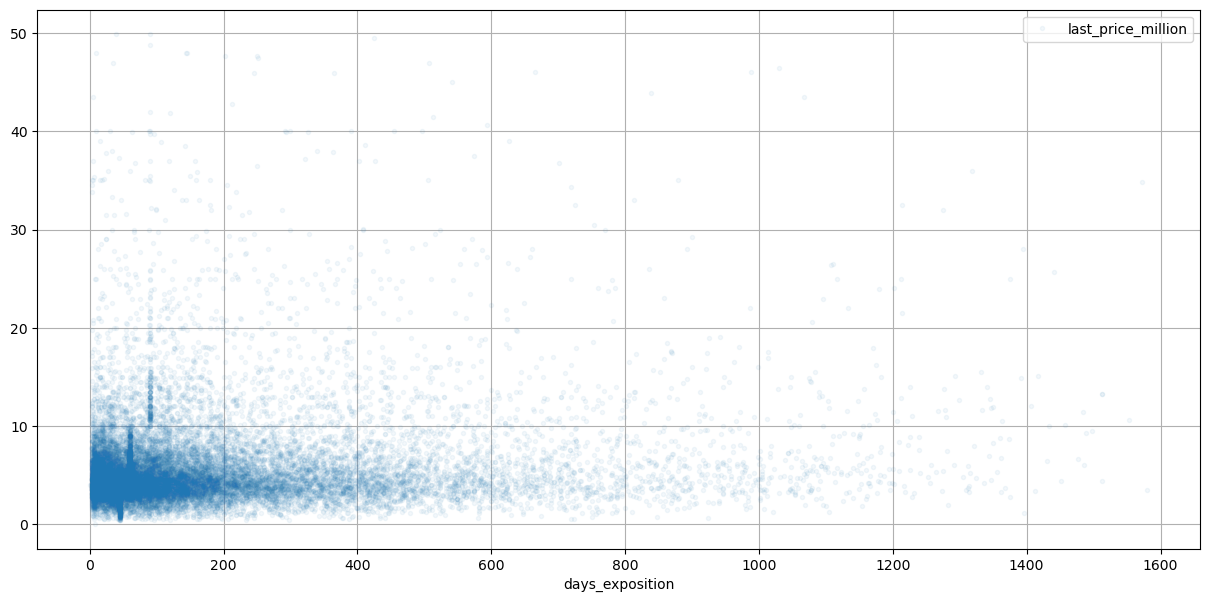

In [117]:
data.sort_values(by='days_exposition').plot(x='days_exposition', y='last_price_million', style='.', grid=True, alpha=0.05, figsize=(15, 7));

В целом, за весь исследуемый период, квартиры стоимостью до 10 млн.руб. продавались максимально быстро, до 150-200 дней.

Также дополнительно исследуем влияние на цену квартиры следующих параметров:

*- "цена квартиры" и расстояние "до центра города"/"до аэропорта"/"до парка"/"до пруда":*

In [118]:
print(data['last_price'].corr(data['airports_nearest']))

-0.03752941292740478


Зависимость цены от близости к аэропорту имеет низкую отрицательную корреляцию и мало влияет на цену.

In [119]:
print(data['last_price'].corr(data['cityCenters_nearest']))

-0.3365199377191448


In [120]:
print(data['last_price'].corr(data['cityCenters_nearest_edit']))

-0.2879145289165724


Зависимость цены от близости к центру города имеет относительно низкую отрицательную корреляцию, оказывает влияние на цену, но не имеет ценоопределяющий характер.

In [121]:
print(data['last_price'].corr(data['parks_nearest']))

0.008485775943627106


Зависимость цены от близости к ближайшему парку имеет низкую корреляцию и мало влияет на цену.

In [122]:
print(data['last_price'].corr(data['ponds_nearest']))

-0.11062322086236516


Зависимость цены от близости к ближайшему пруду имеет низкую отрицательную корреляцию и мало влияет на цену.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра:

Так, например, самое больше число объявлений в следующих населенных пунктах:

In [123]:
price_for_1m2_top = data.pivot_table(index='locality_name', values='price_for_1m2', aggfunc='mean').sort_values(by='price_for_1m2', ascending=False)
print(price_for_1m2_top.head(10))

                   price_for_1m2
locality_name                   
посёлок Лисий Нос  121616.221359
Зеленогорск        115122.799198
Санкт-Петербург    112193.019174
посёлок Репино     104238.614786
Пушкин             103130.851744
Сестрорецк         101757.616875
Кудрово            100253.043304
деревня Мистолово   98549.976709
посёлок Левашово    96997.690531
Мурино              92722.708914


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тебе сначала нужно найти топ10 населённых пунктов по количеству объявлений и уже в этом списке рассчитать среднюю стоимость за квадратный метр и выделить топ1 и топ10
</div>

In [125]:
price_for_1m2_loc = data.groupby('locality_name').agg({'price_for_1m2': 'mean', 'locality_name_edit': "count"}).rename({'locality_name_edit': 'n_records'}, axis=1)
print('Населенные пункты с максимальным кол-вом объявлений:', price_for_1m2_loc.sort_values(by='n_records', ascending=False).round(0).head(11))
print()
price_for_1m2_loc_top = price_for_1m2_loc[price_for_1m2_loc['n_records'] >= 237]
print('Самая высокая стоимость за 1м²:', price_for_1m2_loc_top['price_for_1m2'].max().round(0))
print()
print('Самая низкая стоимость за 1м² (из топ-10):', price_for_1m2_loc_top['price_for_1m2'].min().round(0))

Населенные пункты с максимальным кол-вом объявлений:                    price_for_1m2  n_records
locality_name                              
Санкт-Петербург         112193.0      15528
посёлок Мурино           85752.0        522
посёлок Шушары           78677.0        440
Всеволожск               68654.0        398
Пушкин                  103131.0        367
Колпино                  75333.0        337
посёлок Парголово        90176.0        327
Гатчина                  68746.0        307
деревня Кудрово          92474.0        299
Выборг                   58142.0        237
Петергоф                 84758.0        201



AttributeError: 'float' object has no attribute 'round'

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Исправил
</div>


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

#### Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Не выполнено задание 4.5
    
</div>

In [ ]:
price_for_1m2_from_nearest = data.loc[data['locality_name_edit'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='price_for_1m2', aggfunc='median')
display(price_for_1m2_from_nearest.round(0))
price_for_1m2_from_nearest.plot(grid=True, figsize=(15, 7));

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Выполнил
</div>


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Здесь нужно рассчитать стоимость квадратного метра для каждого километра удаляясь от центра. Удали mean в конце и выведи всю таблицу. По ней ещё можно построить график
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br>Исправил
</div>


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена 👍
</div>

### Общий вывод

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Обязательно нужно написать общий вывод после проделанной работы. Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. А после этого нужно написать общий вывод использую информацию из промежуточных выводов после каждого раздела. Твой вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. 
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

При проведении анализа, после первичного ознакомления с данными, выполнена предобработка данных:
- обработаны пропуски значений (NaN) в тех столбцах, где это возможно
- обработаны неявные дубликаты (столбец 'locality_name')
- в столбцах 'balcony' и 'first_day_exposition' изменены типы данных (на int64 и datetime64 соответственно)
- обработаны выбросы - аномально большие или аномально низкие (неправдоподобные, нереальные) значения исправлены или удалены

Основной объем объявлений в архиве - квартиры площадью от 30м² до 80м², ценой до 10млн.руб.

Количество дней, за которое квартира продавалась, выражено в следующих значениях:  
- 95 - медианное число дней
- 180 - среднее арифметическое число дней

Также выявлено, что день и месяц публикации не оказывают какого-либо значительного влияния на цену квартир, при этом, с 2014 по 2016 годы наблюдается тенденция на снижение стоимости квартир, а в 2017-2018 годах началась положительная динамика на увеличение стоимости квартир.

Также проведенным анализом установлено, что стоимость квартиры максимальным образом зависит от следующих параметров:  
- Общая площадь квартиры (а также связанные с ним напрямую параметры: площади "жилая", и "кухни" соответственно, кол-во комнат): оказывает максимальное влияние на стоимость квартиры. Корреляция равна 0.77
- Локация квартиры: рассчитана стоимость 1м² среди 10 локаций с наибольшим кол-вом объявлений. Самая высокая цена за 1м² в Санкт-Петербурге - 112 193 руб/м²
- Расстояние до центра города: оказывает "среднее" влияние на стоимость квартиры. В среднем, отдаление от центра города на каждый километр сказывается на цене квартиры на 102 278 руб. Корреляция равна 0.33
- Остальные параметры имеют незначительное влияние

<div class="alert alert-info">
<b>Комментарий студента v3:</b>
<br>Исправил.
</div>


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Для того чтобы подписать график мы можем использовать метод plt.title() и в конце кода применить plt.show(). По ссылкам ниже можно почитать подробнее как добавить название для графика или подписать его оси
    
    https://pyprog.pro/mpl/mpl_title.html
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Тут ты в одной части делаешь сразу 3 задания (4.1, 4.2, 4.3) при этом упуская часть деталей:
<br>- не изучена зависимость цены от жилой площади
<br>- не изучена зависимость цены от площади кухни
<br>- не изучана зависимость цены от дня недели, месяца и года, публикации объявления (3 графика)
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br>Исправил, перестроил анализ, разбил по главам и подглавам в соответствии с заданием.
</div>


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудился, большая часть работы сделана, но остаётся внести следующие правки:
<br>- не заполнять пропуски в столбцах с картографическими данными
<br>- не заполнять пропуски в столбце days_exposition
<br>- изменить тип данных в столбце balcony
<br>- доделать задание 4.3
<br>- корректно изучить топ10 населённых пунктов с наибольшим числом объявлений
<br>- сделать задание 4.5
<br>- написать общий вывод
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Остались три правки:
<br>- корректно изучить зависимость цены от времени публикации объявления
<br>- поправить задание 4.5
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v3:</b> 
<br>Остались две правки:
<br>- корректно изучить зависимость цены от времени публикации объявления
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v4:</b>
<br>Все правки выполнены. Молодец!
<br>Проделана огромная работа! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод